### Mike's Note:

You'll needs `pods` to make this notebook work, please download by running:

In [ ]:
!pip install pods

# Bayesian Methods
### [Neil D. Lawrence](http://inverseprobability.com), Amazon Cambridge and University of Sheffield
### 2018-06-04

**Abstract**: Bayesian formalisms deal with uncertainty in parameters,

$$
\newcommand{\Amatrix}{\mathbf{A}}
\newcommand{\KL}[2]{\text{KL}\left( #1\,\|\,#2 \right)}
\newcommand{\Kaast}{\kernelMatrix_{\mathbf{ \ast}\mathbf{ \ast}}}
\newcommand{\Kastu}{\kernelMatrix_{\mathbf{ \ast} \inducingVector}}
\newcommand{\Kff}{\kernelMatrix_{\mappingFunctionVector \mappingFunctionVector}}
\newcommand{\Kfu}{\kernelMatrix_{\mappingFunctionVector \inducingVector}}
\newcommand{\Kuast}{\kernelMatrix_{\inducingVector \bf\ast}}
\newcommand{\Kuf}{\kernelMatrix_{\inducingVector \mappingFunctionVector}}
\newcommand{\Kuu}{\kernelMatrix_{\inducingVector \inducingVector}}
\newcommand{\Kuui}{\Kuu^{-1}}
\newcommand{\Qaast}{\mathbf{Q}_{\bf \ast \ast}}
\newcommand{\Qastf}{\mathbf{Q}_{\ast \mappingFunction}}
\newcommand{\Qfast}{\mathbf{Q}_{\mappingFunctionVector \bf \ast}}
\newcommand{\Qff}{\mathbf{Q}_{\mappingFunctionVector \mappingFunctionVector}}
\newcommand{\aMatrix}{\mathbf{A}}
\newcommand{\aScalar}{a}
\newcommand{\aVector}{\mathbf{a}}
\newcommand{\acceleration}{a}
\newcommand{\bMatrix}{\mathbf{B}}
\newcommand{\bScalar}{b}
\newcommand{\bVector}{\mathbf{b}}
\newcommand{\basisFunc}{\phi}
\newcommand{\basisFuncVector}{\boldsymbol{ \basisFunc}}
\newcommand{\basisFunction}{\phi}
\newcommand{\basisLocation}{\mu}
\newcommand{\basisMatrix}{\boldsymbol{ \Phi}}
\newcommand{\basisScalar}{\basisFunction}
\newcommand{\basisVector}{\boldsymbol{ \basisFunction}}
\newcommand{\activationFunction}{\phi}
\newcommand{\activationMatrix}{\boldsymbol{ \Phi}}
\newcommand{\activationScalar}{\basisFunction}
\newcommand{\activationVector}{\boldsymbol{ \basisFunction}}
\newcommand{\bigO}{\mathcal{O}}
\newcommand{\binomProb}{\pi}
\newcommand{\cMatrix}{\mathbf{C}}
\newcommand{\cbasisMatrix}{\hat{\boldsymbol{ \Phi}}}
\newcommand{\cdataMatrix}{\hat{\dataMatrix}}
\newcommand{\cdataScalar}{\hat{\dataScalar}}
\newcommand{\cdataVector}{\hat{\dataVector}}
\newcommand{\centeredKernelMatrix}{\mathbf{ \MakeUppercase{\centeredKernelScalar}}}
\newcommand{\centeredKernelScalar}{b}
\newcommand{\centeredKernelVector}{\centeredKernelScalar}
\newcommand{\centeringMatrix}{\mathbf{H}}
\newcommand{\chiSquaredDist}[2]{\chi_{#1}^{2}\left(#2\right)}
\newcommand{\chiSquaredSamp}[1]{\chi_{#1}^{2}}
\newcommand{\conditionalCovariance}{\boldsymbol{ \Sigma}}
\newcommand{\coregionalizationMatrix}{\mathbf{B}}
\newcommand{\coregionalizationScalar}{b}
\newcommand{\coregionalizationVector}{\mathbf{ \coregionalizationScalar}}
\newcommand{\covDist}[2]{\text{cov}_{#2}\left(#1\right)}
\newcommand{\covSamp}[1]{\text{cov}\left(#1\right)}
\newcommand{\covarianceScalar}{c}
\newcommand{\covarianceVector}{\mathbf{ \covarianceScalar}}
\newcommand{\covarianceMatrix}{\mathbf{C}}
\newcommand{\covarianceMatrixTwo}{\boldsymbol{ \Sigma}}
\newcommand{\croupierScalar}{s}
\newcommand{\croupierVector}{\mathbf{ \croupierScalar}}
\newcommand{\croupierMatrix}{\mathbf{ \MakeUppercase{\croupierScalar}}}
\newcommand{\dataDim}{p}
\newcommand{\dataIndex}{i}
\newcommand{\dataIndexTwo}{j}
\newcommand{\dataMatrix}{\mathbf{Y}}
\newcommand{\dataScalar}{y}
\newcommand{\dataSet}{\mathcal{D}}
\newcommand{\dataStd}{\sigma}
\newcommand{\dataVector}{\mathbf{ \dataScalar}}
\newcommand{\decayRate}{d}
\newcommand{\degreeMatrix}{\mathbf{ \MakeUppercase{\degreeScalar}}}
\newcommand{\degreeScalar}{d}
\newcommand{\degreeVector}{\mathbf{ \degreeScalar}}
% Already defined by latex
%\newcommand{\det}[1]{\left|#1\right|}
\newcommand{\diag}[1]{\text{diag}\left(#1\right)}
\newcommand{\diagonalMatrix}{\mathbf{D}}
\newcommand{\diff}[2]{\frac{\text{d}#1}{\text{d}#2}}
\newcommand{\diffTwo}[2]{\frac{\text{d}^2#1}{\text{d}#2^2}}
\newcommand{\displacement}{x}
\newcommand{\displacementVector}{\textbf{\displacement}}
\newcommand{\distanceMatrix}{\mathbf{ \MakeUppercase{\distanceScalar}}}
\newcommand{\distanceScalar}{d}
\newcommand{\distanceVector}{\mathbf{ \distanceScalar}}
\newcommand{\eigenvaltwo}{\ell}
\newcommand{\eigenvaltwoMatrix}{\mathbf{L}}
\newcommand{\eigenvaltwoVector}{\mathbf{l}}
\newcommand{\eigenvalue}{\lambda}
\newcommand{\eigenvalueMatrix}{\boldsymbol{ \Lambda}}
\newcommand{\eigenvalueVector}{\boldsymbol{ \lambda}}
\newcommand{\eigenvector}{\mathbf{ \eigenvectorScalar}}
\newcommand{\eigenvectorMatrix}{\mathbf{U}}
\newcommand{\eigenvectorScalar}{u}
\newcommand{\eigenvectwo}{\mathbf{v}}
\newcommand{\eigenvectwoMatrix}{\mathbf{V}}
\newcommand{\eigenvectwoScalar}{v}
\newcommand{\entropy}[1]{\mathcal{H}\left(#1\right)}
\newcommand{\errorFunction}{E}
\newcommand{\expDist}[2]{\left<#1\right>_{#2}}
\newcommand{\expSamp}[1]{\left<#1\right>}
\newcommand{\expectation}[1]{\left\langle #1 \right\rangle }
\newcommand{\expectationDist}[2]{\left\langle #1 \right\rangle _{#2}}
\newcommand{\expectedDistanceMatrix}{\mathcal{D}}
\newcommand{\eye}{\mathbf{I}}
\newcommand{\fantasyDim}{r}
\newcommand{\fantasyMatrix}{\mathbf{ \MakeUppercase{\fantasyScalar}}}
\newcommand{\fantasyScalar}{z}
\newcommand{\fantasyVector}{\mathbf{ \fantasyScalar}}
\newcommand{\featureStd}{\varsigma}
\newcommand{\gammaCdf}[3]{\mathcal{GAMMA CDF}\left(#1|#2,#3\right)}
\newcommand{\gammaDist}[3]{\mathcal{G}\left(#1|#2,#3\right)}
\newcommand{\gammaSamp}[2]{\mathcal{G}\left(#1,#2\right)}
\newcommand{\gaussianDist}[3]{\mathcal{N}\left(#1|#2,#3\right)}
\newcommand{\gaussianSamp}[2]{\mathcal{N}\left(#1,#2\right)}
\newcommand{\given}{|}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\heaviside}{H}
\newcommand{\hiddenMatrix}{\mathbf{ \MakeUppercase{\hiddenScalar}}}
\newcommand{\hiddenScalar}{h}
\newcommand{\hiddenVector}{\mathbf{ \hiddenScalar}}
\newcommand{\identityMatrix}{\eye}
\newcommand{\inducingInputScalar}{z}
\newcommand{\inducingInputVector}{\mathbf{ \inducingInputScalar}}
\newcommand{\inducingInputMatrix}{\mathbf{Z}}
\newcommand{\inducingScalar}{u}
\newcommand{\inducingVector}{\mathbf{ \inducingScalar}}
\newcommand{\inducingMatrix}{\mathbf{U}}
\newcommand{\inlineDiff}[2]{\text{d}#1/\text{d}#2}
\newcommand{\inputDim}{q}
\newcommand{\inputMatrix}{\mathbf{X}}
\newcommand{\inputScalar}{x}
\newcommand{\inputSpace}{\mathcal{X}}
\newcommand{\inputVals}{\inputVector}
\newcommand{\inputVector}{\mathbf{ \inputScalar}}
\newcommand{\iterNum}{k}
\newcommand{\kernel}{\kernelScalar}
\newcommand{\kernelMatrix}{\mathbf{K}}
\newcommand{\kernelScalar}{k}
\newcommand{\kernelVector}{\mathbf{ \kernelScalar}}
\newcommand{\kff}{\kernelScalar_{\mappingFunction \mappingFunction}}
\newcommand{\kfu}{\kernelVector_{\mappingFunction \inducingScalar}}
\newcommand{\kuf}{\kernelVector_{\inducingScalar \mappingFunction}}
\newcommand{\kuu}{\kernelVector_{\inducingScalar \inducingScalar}}
\newcommand{\lagrangeMultiplier}{\lambda}
\newcommand{\lagrangeMultiplierMatrix}{\boldsymbol{ \Lambda}}
\newcommand{\lagrangian}{L}
\newcommand{\laplacianFactor}{\mathbf{ \MakeUppercase{\laplacianFactorScalar}}}
\newcommand{\laplacianFactorScalar}{m}
\newcommand{\laplacianFactorVector}{\mathbf{ \laplacianFactorScalar}}
\newcommand{\laplacianMatrix}{\mathbf{L}}
\newcommand{\laplacianScalar}{\ell}
\newcommand{\laplacianVector}{\mathbf{ \ell}}
\newcommand{\latentDim}{q}
\newcommand{\latentDistanceMatrix}{\boldsymbol{ \Delta}}
\newcommand{\latentDistanceScalar}{\delta}
\newcommand{\latentDistanceVector}{\boldsymbol{ \delta}}
\newcommand{\latentForce}{f}
\newcommand{\latentFunction}{u}
\newcommand{\latentFunctionVector}{\mathbf{ \latentFunction}}
\newcommand{\latentFunctionMatrix}{\mathbf{ \MakeUppercase{\latentFunction}}}
\newcommand{\latentIndex}{j}
\newcommand{\latentScalar}{z}
\newcommand{\latentVector}{\mathbf{ \latentScalar}}
\newcommand{\latentMatrix}{\mathbf{Z}}
\newcommand{\learnRate}{\eta}
\newcommand{\lengthScale}{\ell}
\newcommand{\rbfWidth}{\ell}
\newcommand{\likelihoodBound}{\mathcal{L}}
\newcommand{\likelihoodFunction}{L}
\newcommand{\locationScalar}{\mu}
\newcommand{\locationVector}{\boldsymbol{ \locationScalar}}
\newcommand{\locationMatrix}{\mathbf{M}}
\newcommand{\variance}[1]{\text{var}\left( #1 \right)}
\newcommand{\mappingFunction}{f}
\newcommand{\mappingFunctionMatrix}{\mathbf{F}}
\newcommand{\mappingFunctionTwo}{g}
\newcommand{\mappingFunctionTwoMatrix}{\mathbf{G}}
\newcommand{\mappingFunctionTwoVector}{\mathbf{ \mappingFunctionTwo}}
\newcommand{\mappingFunctionVector}{\mathbf{ \mappingFunction}}
\newcommand{\scaleScalar}{s}
\newcommand{\mappingScalar}{w}
\newcommand{\mappingVector}{\mathbf{ \mappingScalar}}
\newcommand{\mappingMatrix}{\mathbf{W}}
\newcommand{\mappingScalarTwo}{v}
\newcommand{\mappingVectorTwo}{\mathbf{ \mappingScalarTwo}}
\newcommand{\mappingMatrixTwo}{\mathbf{V}}
\newcommand{\maxIters}{K}
\newcommand{\meanMatrix}{\mathbf{M}}
\newcommand{\meanScalar}{\mu}
\newcommand{\meanTwoMatrix}{\mathbf{M}}
\newcommand{\meanTwoScalar}{m}
\newcommand{\meanTwoVector}{\mathbf{ \meanTwoScalar}}
\newcommand{\meanVector}{\boldsymbol{ \meanScalar}}
\newcommand{\mrnaConcentration}{m}
\newcommand{\naturalFrequency}{\omega}
\newcommand{\neighborhood}[1]{\mathcal{N}\left( #1 \right)}
\newcommand{\neilurl}{http://inverseprobability.com/}
\newcommand{\noiseMatrix}{\boldsymbol{ E}}
\newcommand{\noiseScalar}{\epsilon}
\newcommand{\noiseVector}{\boldsymbol{ \epsilon}}
\newcommand{\norm}[1]{\left\Vert #1 \right\Vert}
\newcommand{\normalizedLaplacianMatrix}{\hat{\mathbf{L}}}
\newcommand{\normalizedLaplacianScalar}{\hat{\ell}}
\newcommand{\normalizedLaplacianVector}{\hat{\mathbf{ \ell}}}
\newcommand{\numActive}{m}
\newcommand{\numBasisFunc}{m}
\newcommand{\numComponents}{m}
\newcommand{\numComps}{K}
\newcommand{\numData}{n}
\newcommand{\numFeatures}{K}
\newcommand{\numHidden}{h}
\newcommand{\numInducing}{m}
\newcommand{\numLayers}{\ell}
\newcommand{\numNeighbors}{K}
\newcommand{\numSequences}{s}
\newcommand{\numSuccess}{s}
\newcommand{\numTasks}{m}
\newcommand{\numTime}{T}
\newcommand{\numTrials}{S}
\newcommand{\outputIndex}{j}
\newcommand{\paramVector}{\boldsymbol{ \theta}}
\newcommand{\parameterMatrix}{\boldsymbol{ \Theta}}
\newcommand{\parameterScalar}{\theta}
\newcommand{\parameterVector}{\boldsymbol{ \parameterScalar}}
\newcommand{\partDiff}[2]{\frac{\partial#1}{\partial#2}}
\newcommand{\precisionScalar}{j}
\newcommand{\precisionVector}{\mathbf{ \precisionScalar}}
\newcommand{\precisionMatrix}{\mathbf{J}}
\newcommand{\pseudotargetScalar}{\widetilde{y}}
\newcommand{\pseudotargetVector}{\mathbf{ \pseudotargetScalar}}
\newcommand{\pseudotargetMatrix}{\mathbf{ \widetilde{Y}}}
\newcommand{\rank}[1]{\text{rank}\left(#1\right)}
\newcommand{\rayleighDist}[2]{\mathcal{R}\left(#1|#2\right)}
\newcommand{\rayleighSamp}[1]{\mathcal{R}\left(#1\right)}
\newcommand{\responsibility}{r}
\newcommand{\rotationScalar}{r}
\newcommand{\rotationVector}{\mathbf{ \rotationScalar}}
\newcommand{\rotationMatrix}{\mathbf{R}}
\newcommand{\sampleCovScalar}{s}
\newcommand{\sampleCovVector}{\mathbf{ \sampleCovScalar}}
\newcommand{\sampleCovMatrix}{\mathbf{s}}
\newcommand{\scalarProduct}[2]{\left\langle{#1},{#2}\right\rangle}
\newcommand{\sign}[1]{\text{sign}\left(#1\right)}
\newcommand{\sigmoid}[1]{\sigma\left(#1\right)}
\newcommand{\singularvalue}{\ell}
\newcommand{\singularvalueMatrix}{\mathbf{L}}
\newcommand{\singularvalueVector}{\mathbf{l}}
\newcommand{\sorth}{\mathbf{u}}
\newcommand{\spar}{\lambda}
\newcommand{\trace}[1]{\text{tr}\left(#1\right)}
\newcommand{\BasalRate}{B}
\newcommand{\DampingCoefficient}{C}
\newcommand{\DecayRate}{D}
\newcommand{\Displacement}{X}
\newcommand{\LatentForce}{F}
\newcommand{\Mass}{M}
\newcommand{\Sensitivity}{S}
\newcommand{\basalRate}{b}
\newcommand{\dampingCoefficient}{c}
\newcommand{\mass}{m}
\newcommand{\sensitivity}{s}
\newcommand{\springScalar}{\kappa}
\newcommand{\springVector}{\boldsymbol{ \kappa}}
\newcommand{\springMatrix}{\boldsymbol{ \mathcal{K}}}
\newcommand{\tfConcentration}{p}
\newcommand{\tfDecayRate}{\delta}
\newcommand{\tfMrnaConcentration}{f}
\newcommand{\tfVector}{\mathbf{ \tfConcentration}}
\newcommand{\velocity}{v}
\newcommand{\sufficientStatsScalar}{g}
\newcommand{\sufficientStatsVector}{\mathbf{ \sufficientStatsScalar}}
\newcommand{\sufficientStatsMatrix}{\mathbf{G}}
\newcommand{\switchScalar}{s}
\newcommand{\switchVector}{\mathbf{ \switchScalar}}
\newcommand{\switchMatrix}{\mathbf{S}}
\newcommand{\tr}[1]{\text{tr}\left(#1\right)}
\newcommand{\loneNorm}[1]{\left\Vert #1 \right\Vert_1}
\newcommand{\ltwoNorm}[1]{\left\Vert #1 \right\Vert_2}
\newcommand{\onenorm}[1]{\left\vert#1\right\vert_1}
\newcommand{\twonorm}[1]{\left\Vert #1 \right\Vert}
\newcommand{\vScalar}{v}
\newcommand{\vVector}{\mathbf{v}}
\newcommand{\vMatrix}{\mathbf{V}}
\newcommand{\varianceDist}[2]{\text{var}_{#2}\left( #1 \right)}
% Already defined by latex
%\newcommand{\vec}{#1:}
\newcommand{\vecb}[1]{\left(#1\right):}
\newcommand{\weightScalar}{w}
\newcommand{\weightVector}{\mathbf{ \weightScalar}}
\newcommand{\weightMatrix}{\mathbf{W}}
\newcommand{\weightedAdjacencyMatrix}{\mathbf{A}}
\newcommand{\weightedAdjacencyScalar}{a}
\newcommand{\weightedAdjacencyVector}{\mathbf{ \weightedAdjacencyScalar}}
\newcommand{\onesVector}{\mathbf{1}}
\newcommand{\zerosVector}{\mathbf{0}}
$$

## What is Machine Learning?

What is machine learning? At its most basic level machine learning is a
combination of

$$ \text{data} + \text{model} \xrightarrow{\text{compute}} \text{prediction}$$

where *data* is our observations. They can be actively or passively
acquired (meta-data). The *model* contains our assumptions, based on
previous experience. THat experience can be other data, it can come from
transfer learning, or it can merely be our beliefs about the
regularities of the universe. In humans our models include our inductive
biases. The *prediction* is an action to be taken or a categorization or
a quality score. The reason that machine learning has become a mainstay
of artificial intelligence is the importance of predictions in
artificial intelligence. The data and the model are combined through
computation.

In practice we normally perform machine learning using two functions. To
combine data with a model we typically make use of:

**a prediction function** a function which is used to make the
predictions. It includes our beliefs about the regularities of the
universe, our assumptions about how the world works, e.g. smoothness,
spatial similarities, temporal similarities.

**an objective function** a function which defines the cost of
misprediction. Typically it includes knowledge about the world's
generating processes (probabilistic objectives) or the costs we pay for
mispredictions (empiricial risk minimization).

The combination of data and model through the prediction function and
the objectie function leads to a *learning algorithm*. The class of
prediction functions and objective functions we can make use of is
restricted by the algorithms they lead to. If the prediction function or
the objective function are too complex, then it can be difficult to find
an appropriate learning algorithm. Much of the acdemic field of machine
learning is the quest for new learning algorithms that allow us to bring
different types of models and data together.

A useful reference for state of the art in machine learning is the UK
Royal Society Report, [Machine Learning: Power and Promise of Computers
that Learn by
Example](https://royalsociety.org/~/media/policy/projects/machine-learning/publications/machine-learning-report.pdf).

You can also check my blog post on ["What is Machine
Learning?"](http://inverseprobability.com/2017/07/17/what-is-machine-learning)

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pods
import teaching_plots as plot
import mlai

### Olympic Marathon Data

The first thing we will do is load a standard data set for regression
modelling. The data consists of the pace of Olympic Gold Medal Marathon
winners for the Olympics from 1896 to present. First we load in the data
and plot.

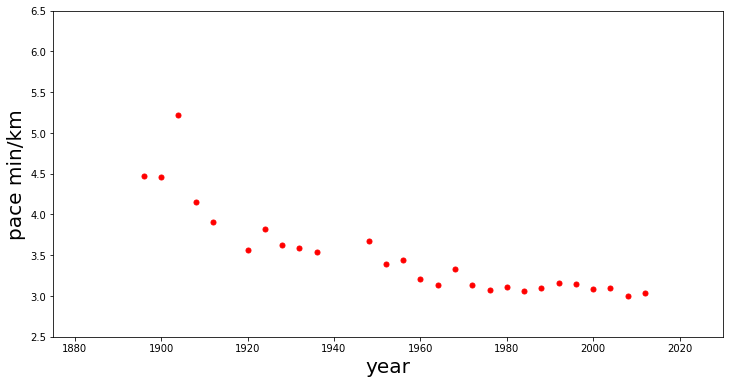

In [86]:
data = pods.datasets.olympic_marathon_men()
x = data['X']
y = data['Y']

offset = y.mean()
scale = np.sqrt(y.var())

xlim = (1875,2030)
ylim = (2.5, 6.5)
yhat = (y-offset)/scale

fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x, y, 'r.',markersize=10)
ax.set_xlabel('year', fontsize=20)
ax.set_ylabel('pace min/km', fontsize=20)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

mlai.write_figure(figure=fig, filename='olympic-marathon.svg', transparent=True, frameon=True)

### Olympic Marathon Data

<table>
<tr>
<td width="70%">
-   Gold medal times for Olympic Marathon since 1896.

-   Marathons before 1924 didn’t have a standardised distance.

-   Present results using pace per km.

-   In 1904 Marathon was badly organised leading to very slow times.

</td>
<td width="30%">
![image](Stephen_Kiprotich.jpg) <small>Image from
Wikimedia Commons <http://bit.ly/16kMKHQ></small>
</td>
</tr>
</table>
<img src="olympic-marathon.svg" align="">

Things to notice about the data include the outlier in 1904, in this
year, the olympics was in St Louis, USA. Organizational problems and
challenges with dust kicked up by the cars following the race meant that
participants got lost, and only very few participants completed.

More recent years see more consistently quick marathons.

### Regression: Linear Releationship

For many their first encounter with what might be termed a machine
learning method is fitting a straight line. A straight line is
characterized by two parameters, the scale, $m$, and the offset $c$.

$$\dataScalar_i = m \inputScalar_i + c$$

For the olympic marathon example $\dataScalar_i$ is the winning pace and
it is given as a function of the year which is represented by
$\inputScalar_i$. There are two further parameters of the prediction
function. For the olympics example we can interpret these parameters,
the scale $m$ is the rate of improvement of the olympic marathon pace on
a yearly basis. And $c$ is the winning pace as estimated at year 0.

## Overdetermined System

The challenge with a linear model is that it has two unknowns, $m$, and
$c$. Observing data allows us to write down a system of simultaneous
linear equations. So, for example if we observe two data points, the
first with the input value, $\inputScalar_1 = 1$ and the output value,
$\dataScalar_1 =3$ and a second data point, $\inputScalar = 3$,
$\dataScalar=1$, then we can write two simultaneous linear equations of
the form.

point 1: $\inputScalar = 1$, $\dataScalar=3$ $$3 = m + c$$ point 2:
$\inputScalar = 3$, $\dataScalar=1$ $$1 = 3m + c$$

The solution to these two simultaneous equations can be represented
graphically as

<img src="over_determined_system003.svg" align="">
<center>
*The solution of two linear equations represented as the fit of a
straight line through two data *
</center>
The challenge comes when a third data point is observed and it doesn't
naturally fit on the straight line.

point 3: $\inputScalar = 2$, $\dataScalar=2.5$ $$2.5 = 2m + c$$

<img src="over_determined_system004.svg" align="">
<center>
*A third observation of data is inconsistent with the solution dictated
by the first two observations *
</center>
Now there are three candidate lines, each consistent with our data.

<img src="over_determined_system007.svg" align="">
<center>
*Three solutions to the problem, each consistent with two points of the
three observations *
</center>
This is known as an *overdetermined* system because there are more data
than we need to determine our parameters. The problem arises because the
model is a simplification of the real world, and the data we observe is
therefore inconsistent with our model.

In [87]:
import teaching_plots as plot

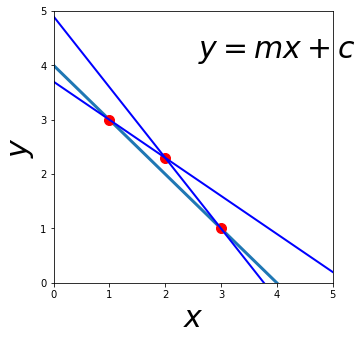

In [88]:
plot.over_determined_system(diagrams='')

In [89]:
from ipywidgets import IntSlider
import pods

In [91]:
#pods.notebook.display_plots('over_determined_system{samp:0>3}.svg', directory='', samp=IntSlider(1,1,8,1))

The solution was proposed by Pierre-Simon Laplace. His idea was to
accept that the model was an incomplete representation of the real
world, and the manner in which it was incomplete is *unknown*. His idea
was that such unknowns could be dealt with through probability.

<img class="" src="Pierre-Simon_Laplace.png" width="30%" align="" style="background:none; border:none; box-shadow:none;">

Famously, Laplace considered the idea of a deterministic Universe, one
in which the model is *known*, or as the below translation refers to it,
"an intelligence which could comprehend all the forces by which nature
is animated". He speculates on an "intelligence" that can submit this
vast data to analysis and propsoses that such an entity would be able to
predict the future.

> Given for one instant an intelligence which could comprehend all the
> forces by which nature is animated and the respective situation of the
> beings who compose it---an intelligence sufficiently vast to submit
> these data to analysis---it would embrace in the same formulate the
> movements of the greatest bodies of the universe and those of the
> lightest atom; for it, nothing would be uncertain and the future, as
> the past, would be present in its eyes.

This notion is known as *Laplace's demon* or *Laplace's superman*.

Unfortunately, most analyses of his ideas stop at that point, whereas
his real point is that such a notion is unreachable. Not so much
*superman* as *strawman*. Just three pages later in the "Philosophical
Essay on Probabilities" [@Laplace:essai14], Laplace goes on to observe:

> The curve described by a simple molecule of air or vapor is regulated
> in a manner just as certain as the planetary orbits; the only
> difference between them is that which comes from our ignorance.
>
> Probability is relative, in part to this ignorance, in part to our
> knowledge.

In other words, we can never utilize the idealistic deterministc
Universe due to our ignorance about the world, Laplace's suggestion, and
focus in this essay is that we turn to probability to deal with this
uncertainty.

Laplace's concept was that the reason that the data doesn't match up to
the model is because of unconsidered factors, and that these might be
well represented through probability densities. He tackles the challenge
of the unknown factors by adding a variable, $\noiseScalar$, that
represents the unknown. In modern parlance we would call this a *latent*
variable. But in the context Laplace uses it, the variable is so common
that it has other names such as a "slack" variable or the *noise* in the
system.

point 1: $\inputScalar = 1$, $\dataScalar=3$ $$
3 = m + c + \noiseScalar_1
$$ point 2: $\inputScalar = 3$, $\dataScalar=1$ $$
1 = 3m + c + \noiseScalar_2
$$ point 3: $\inputScalar = 2$, $\dataScalar=2.5$ $$
2.5 = 2m + c + \noiseScalar_3
$$

Laplace's trick has converted the *overdetermined* system into an
*underdetermined* system. He has now added three variables,
$\{\noiseScalar_i\}_{i=1}^3$, which represent the unknown corruptions of
the real world. Laplace's idea is that we should represent that unknown
corruption with a *probability distribution*.

### A Probabilistic Process

However, it was left to an admirer of Gauss to develop a practical
probability density for that purpose. It was Carl Friederich Gauss who
suggested that the *Gaussian* density (which at the time was unnamed!)
should be used to represent this error.

The result is a *noisy* function, a function which has a deterministic
part, and a stochastic part. This type of function is sometimes known as
a probabilistic or stochastic process, to distinguish it from a
deterministic process.

### The Gaussian Density

The Gaussian density is perhaps the most commonly used probability
density. It is defined by a *mean*, $\meanScalar$, and a *variance*,
$\dataStd^2$. The variance is taken to be the square of the *standard
deviation*, $\dataStd$.

$$\begin{align}
  p(\dataScalar| \meanScalar, \dataStd^2) & = \frac{1}{\sqrt{2\pi\dataStd^2}}\exp\left(-\frac{(\dataScalar - \meanScalar)^2}{2\dataStd^2}\right)\\& \buildrel\triangle\over = \gaussianDist{\dataScalar}{\meanScalar}{\dataStd^2}
  \end{align}$$

In [12]:
import teaching_plots as plot

In [13]:
plot.gaussian_of_height(diagrams='')

<img src="gaussian_of_height.svg" align="">

<center>
*The Gaussian PDF with ${\meanScalar}=1.7$ and variance
${\dataStd}^2=0.0225$. Mean shown as cyan line. It could represent the
heights of a population of students. *
</center>
### Two Important Gaussian Properties

The Gaussian density has many important properties, but for the moment
we'll review two of them.

### Sum of Gaussians

If we assume that a variable, $\dataScalar_i$, is sampled from a
Gaussian density,

$$\dataScalar_i \sim \gaussianSamp{\meanScalar_i}{\sigma_i^2}$$

Then we can show that the sum of a set of variables, each drawn
independently from such a density is also distributed as Gaussian. The
mean of the resulting density is the sum of the means, and the variance
is the sum of the variances,

$$\sum_{i=1}^{\numData} \dataScalar_i \sim \gaussianSamp{\sum_{i=1}^\numData \meanScalar_i}{\sum_{i=1}^\numData \sigma_i^2}$$

Since we are very familiar with the Gaussian density and its properties,
it is not immediately apparent how unusual this is. Most random
variables, when you add them together, change the family of density they
are drawn from. For example, the Gaussian is exceptional in this regard.
Indeed, other random variables, if they are independently drawn and
summed together tend to a Gaussian density. That is the [*central limit
theorem*](https://en.wikipedia.org/wiki/Central_limit_theorem) which is
a major justification for the use of a Gaussian density.

### Scaling a Gaussian

Less unusual is the *scaling* property of a Gaussian density. If a
variable, $\dataScalar$, is sampled from a Gaussian density,

$$\dataScalar \sim \gaussianSamp{\meanScalar}{\sigma^2}$$ and we choose
to scale that variable by a *deterministic* value, $\mappingScalar$,
then the *scaled variable* is distributed as

$$\mappingScalar \dataScalar \sim \gaussianSamp{\mappingScalar\meanScalar}{\mappingScalar^2 \sigma^2}.$$
Unlike the summing properties, where adding two or more random variables
independently sampled from a family of densitites typically brings the
summed variable *outside* that family, scaling many densities leaves the
distribution of that variable in the same *family* of densities. Indeed,
many densities include a *scale* parameter (e.g. the [Gamma
density](https://en.wikipedia.org/wiki/Gamma_distribution)) which is
purely for this purpose. In the Gaussian the standard deviation,
$\dataStd$, is the scale parameter. To see why this makes sense, let's
consider, $$z \sim \gaussianSamp{0}{1},$$ then if we scale by $\dataStd$
so we have, $\dataScalar=\dataStd z$, we can write,
$$\dataScalar =\dataStd z \sim \gaussianSamp{0}{\dataStd^2}$$

## Laplace's Idea

### A Probabilistic Process

Laplace had the idea to augment the observations by noise, that is
equivalent to considering a probability density whose mean is given by
the *prediction function*
$$p\left(\dataScalar_i|\inputScalar_i\right)=\frac{1}{\sqrt{2\pi\dataStd^2}}\exp\left(-\frac{\left(\dataScalar_i-f\left(\inputScalar_i\right)\right)^{2}}{2\dataStd^2}\right).$$

This is known as *stochastic process*. It is a function that is
corrupted by noise. Laplace didn't suggest the Gaussian density for that
purpose, that was an innovation from Carl Friederich Gauss, which is
what gives the Gaussian density its name.

### Height as a Function of Weight

In the standard Gaussian, parametized by mean and variance.

Make the mean a linear function of an *input*.

This leads to a regression model. $$
\begin{align*}
  \dataScalar_i=&\mappingFunction\left(\inputScalar_i\right)+\noiseScalar_i,\\
         \noiseScalar_i \sim & \gaussianSamp{0}{\dataStd^2}.
  \end{align*}
$$

Assume $\dataScalar_i$ is height and $\inputScalar_i$ is weight.

Likelihood of an individual data point $$
p\left(\dataScalar_i|\inputScalar_i,m,c\right)=\frac{1}{\sqrt{2\pi \dataStd^2}}\exp\left(-\frac{\left(\dataScalar_i-m\inputScalar_i-c\right)^{2}}{2\dataStd^2}\right).
$$ Parameters are gradient, $m$, offset, $c$ of the function and noise
variance $\dataStd^2$.

### Data Set Likelihood

If the noise, $\epsilon_i$ is sampled independently for each data point.
Each data point is independent (given $m$ and $c$). For *independent*
variables: $$
p(\dataVector) = \prod_{i=1}^\numData p(\dataScalar_i)
$$ $$
p(\dataVector|\inputVector, m, c) = \prod_{i=1}^\numData p(\dataScalar_i|\inputScalar_i, m, c)
$$

### For Gaussian

i.i.d. assumption $$
p(\dataVector|\inputVector, m, c) = \prod_{i=1}^\numData \frac{1}{\sqrt{2\pi \dataStd^2}}\exp \left(-\frac{\left(\dataScalar_i- m\inputScalar_i-c\right)^{2}}{2\dataStd^2}\right).
$$ $$
p(\dataVector|\inputVector, m, c) = \frac{1}{\left(2\pi \dataStd^2\right)^{\frac{\numData}{2}}}\exp\left(-\frac{\sum_{i=1}^\numData\left(\dataScalar_i-m\inputScalar_i-c\right)^{2}}{2\dataStd^2}\right).
$$

### Log Likelihood Function

-   Normally work with the log likelihood: $$
    L(m,c,\dataStd^{2})=-\frac{\numData}{2}\log 2\pi -\frac{\numData}{2}\log \dataStd^2 -\sum_{i=1}^{\numData}\frac{\left(\dataScalar_i-m\inputScalar_i-c\right)^{2}}{2\dataStd^2}.
    $$

### Consistency of Maximum Likelihood

-   If data was really generated according to probability we specified.
-   Correct parameters will be recovered in limit as
    $\numData \rightarrow \infty$.
-   This can be proven through sample based approximations (law of large
    numbers) of "KL divergences".
-   Mainstay of classical statistics.

### Probabilistic Interpretation of the Error Function

-   Probabilistic Interpretation for Error Function is Negative Log
    Likelihood.
-   *Minimizing* error function is equivalent to *maximizing* log
    likelihood.
-   Maximizing *log likelihood* is equivalent to maximizing the
    *likelihood* because $\log$ is monotonic.
-   Probabilistic interpretation: Minimizing error function is
    equivalent to maximum likelihood with respect to parameters.

### Error Function

-   Negative log likelihood is the error function leading to an error
    function
    $$\errorFunction(m,c,\dataStd^{2})=\frac{\numData}{2}\log \dataStd^2+\frac{1}{2\dataStd^2}\sum _{i=1}^{\numData}\left(\dataScalar_i-m\inputScalar_i-c\right)^{2}.$$
-   Learning proceeds by minimizing this error function for the data set
    provided.

### Connection: Sum of Squares Error

-   Ignoring terms which don’t depend on $m$ and $c$ gives
    $$\errorFunction(m, c) \propto \sum_{i=1}^\numData (\dataScalar_i - \mappingFunction(\inputScalar_i))^2$$
    where $\mappingFunction(\inputScalar_i) = m\inputScalar_i + c$.
-   This is known as the *sum of squares* error function.
-   Commonly used and is closely associated with the Gaussian
    likelihood.

### Reminder

-   Two functions involved:
    -   *Prediction function*: $\mappingFunction(\inputScalar_i)$
    -   Error, or *Objective function*: $\errorFunction(m, c)$
-   Error function depends on parameters through prediction function.

### Mathematical Interpretation

-   What is the mathematical interpretation?
-   There is a cost function.
    -   It expresses mismatch between your prediction and reality. $$
          \errorFunction(m, c)=\sum_{i=1}^\numData \left(\dataScalar_i - m\inputScalar_i-c\right)^2
          $$
    -   This is known as the sum of squares error.

## Sum of Squares Error

Minimizing the sum of squares error was first proposed by
[Legendre](http://en.wikipedia.org/wiki/Adrien-Marie_Legendre) in 1805.
His book, which was on the orbit of comets, is available on google
books, we can take a look at the relevant page by calling the code
below.

In [14]:
import pods
pods.notebook.display_google_book(id='spcAAAAAMAAJ', page=72)

Of course, the main text is in French, but the key part we are
interested in can be roughly translated as

> In most matters where we take measures data through observation, the
> most accurate results they can offer, it is almost always leads to a
> system of equations of the form $$E = a + bx + cy + fz + etc .$$ where
> $a$, $b$, $c$, $f$ etc are the known coefficients and $x$, $y$, $z$
> etc are unknown and must be determined by the condition that the value
> of E is reduced, for each equation, to an amount or zero or very
> small.

He continues

> Of all the principles that we can offer for this item, I think it is
> not broader, more accurate, nor easier than the one we have used in
> previous research application, and that is to make the minimum sum of
> the squares of the errors. By this means, it is between the errors a
> kind of balance that prevents extreme to prevail, is very specific to
> make known the state of the closest to the truth system. The sum of
> the squares of the errors
> $E^2 + \left.E^\prime\right.^2 + \left.E^{\prime\prime}\right.^2 + etc$
> being
> \begin{align*}   &(a + bx + cy + fz + etc)^2 \\
> + &(a^\prime +
> b^\prime x + c^\prime y + f^\prime z + etc ) ^2\\
> + &(a^{\prime\prime} +
> b^{\prime\prime}x  + c^{\prime\prime}y +  f^{\prime\prime}z + etc )^2 \\
> + & etc
> \end{align*}
> if we wanted a minimum, by varying x alone, we will have the equation
> ...

This is the earliest know printed version of the problem of least
squares. The notation, however, is a little awkward for mordern eyes. In
particular Legendre doesn't make use of the sum sign, $$
\sum_{i=1}^3 z_i = z_1
+ z_2 + z_3
$$ nor does he make use of the inner product.

In our notation, if we were to do linear regression, we would need to
subsititue: $$\begin{align*}
a &\leftarrow \dataScalar_1-c, \\ a^\prime &\leftarrow \dataScalar_2-c,\\ a^{\prime\prime} &\leftarrow
\dataScalar_3 -c,\\ 
\text{etc.} 
\end{align*}$$ to introduce the data observations
$\{\dataScalar_i\}_{i=1}^{\numData}$ alongside $c$, the offset. We would
then introduce the input locations $$\begin{align*}
b & \leftarrow \inputScalar_1,\\
b^\prime & \leftarrow \inputScalar_2,\\
b^{\prime\prime} & \leftarrow \inputScalar_3\\
\text{etc.}
\end{align*}$$ and finally the gradient of the function
$$x \leftarrow -m.$$ The remaining coefficients ($c$ and $f$) would then
be zero. That would give us $$\begin{align*}   &(\dataScalar_1 -
(m\inputScalar_1+c))^2 \\
+ &(\dataScalar_2 -(m\inputScalar_2 + c))^2\\
+ &(\dataScalar_3 -(m\inputScalar_3 + c))^2 \\
+ &
\text{etc.}
\end{align*}$$ which we would write in the modern notation for sums as
$$
\sum_{i=1}^\numData (\dataScalar_i-(m\inputScalar_i + c))^2
$$ which is recognised as the sum of squares error for a linear
regression.

This shows the advantage of modern [summation
operator](http://en.wikipedia.org/wiki/Summation), $\sum$, in keeping
our mathematical notation compact. Whilst it may look more complicated
the first time you see it, understanding the mathematical rules that go
around it, allows us to go much further with the notation.

Inner products (or [dot
products](http://en.wikipedia.org/wiki/Dot_product)) are similar. They
allow us to write $$
\sum_{i=1}^q u_i v_i
$$ in a more compact notation, $\mathbf{u}\cdot\mathbf{v}.$

Here we are using bold face to represent vectors, and we assume that the
individual elements of a vector $\mathbf{z}$ are given as a series of
scalars $$
\mathbf{z} = \begin{bmatrix} z_1\\ z_2\\ \vdots\\ z_\numData
\end{bmatrix}
$$ which are each indexed by their position in the vector.

## Linear Algebra

Linear algebra provides a very similar role, when we introduce [linear
algebra](http://en.wikipedia.org/wiki/Linear_algebra), it is because we
are faced with a large number of addition and multiplication operations.
These operations need to be done together and would be very tedious to
write down as a group. So the first reason we reach for linear algebra
is for a more compact representation of our mathematical formulae.

### Running Example: Olympic Marathons

Now we will load in the Olympic marathon data. This is data of the
olympic marath times for the men's marathon from the first olympics in
1896 up until the London 2012 olympics.

In [15]:
data = pods.datasets.olympic_marathon_men()
x = data['X']
y = data['Y']

You can see what these values are by typing:

In [16]:
print(x)
print(y)

[[1896.]
 [1900.]
 [1904.]
 [1908.]
 [1912.]
 [1920.]
 [1924.]
 [1928.]
 [1932.]
 [1936.]
 [1948.]
 [1952.]
 [1956.]
 [1960.]
 [1964.]
 [1968.]
 [1972.]
 [1976.]
 [1980.]
 [1984.]
 [1988.]
 [1992.]
 [1996.]
 [2000.]
 [2004.]
 [2008.]
 [2012.]]
[[4.47083333]
 [4.46472926]
 [5.22208333]
 [4.15467867]
 [3.90331675]
 [3.56951267]
 [3.82454477]
 [3.62483707]
 [3.59284275]
 [3.53880792]
 [3.67010309]
 [3.39029111]
 [3.43642612]
 [3.20583007]
 [3.13275665]
 [3.32819844]
 [3.13583758]
 [3.0789588 ]
 [3.10581822]
 [3.06552909]
 [3.09357349]
 [3.16111704]
 [3.14255244]
 [3.08527867]
 [3.10265829]
 [2.99877553]
 [3.03392977]]


Note that they are not `pandas` data frames for this example, they are
just arrays of dimensionality $\numData\times 1$, where $\numData$ is
the number of data.

The aim of this lab is to have you coding linear regression in python.
We will do it in two ways, once using iterative updates (coordinate
ascent) and then using linear algebra. The linear algebra approach will
not only work much better, it is easy to extend to multiple input linear
regression and *non-linear* regression using basis functions.

### Plotting the Data

You can make a plot of $\dataScalar$ vs $\inputScalar$ with the
following command:

In [17]:
%matplotlib inline 
import matplotlib.pyplot as plt

Text(0,0.5,'pace in min/km')

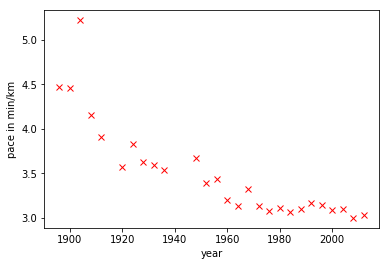

In [18]:
plt.plot(x, y, 'rx')
plt.xlabel('year')
plt.ylabel('pace in min/km')

### Maximum Likelihood: Iterative Solution

Now we will take the maximum likelihood approach we derived in the
lecture to fit a line, $\dataScalar_i=m\inputScalar_i + c$, to the data
you've plotted. We are trying to minimize the error function: $$
\errorFunction(m, c) =  \sum_{i=1}^\numData(\dataScalar_i-m\inputScalar_i-c)^2
$$ with respect to $m$, $c$ and $\sigma^2$. We can start with an initial
guess for $m$,

In [19]:
m = -0.4
c = 80

Then we use the maximum likelihood update to find an estimate for the
offset, $c$.

### Coordinate Descent

In the movie recommender system example, we minimised the objective
function by steepest descent based gradient methods. Our updates
required us to compute the gradient at the position we were located,
then to update the gradient according to the direction of steepest
descent. This time, we will take another approach. It is known as
*coordinate descent*. In coordinate descent, we choose to move one
parameter at a time. Ideally, we design an algorithm that at each step
moves the parameter to its minimum value. At each step we choose to move
the individual parameter to its minimum.

To find the minimum, we look for the point in the curve where the
gradient is zero. This can be found by taking the gradient of
$\errorFunction(m,c)$ with respect to the parameter.

#### Update for Offset

Let's consider the parameter $c$ first. The gradient goes nicely through
the summation operator, and we obtain $$
\frac{\text{d}\errorFunction(m,c)}{\text{d}c} = -\sum_{i=1}^\numData 2(\dataScalar_i-m\inputScalar_i-c).
$$ Now we want the point that is a minimum. A minimum is an example of a
[*stationary point*](http://en.wikipedia.org/wiki/Stationary_point), the
stationary points are those points of the function where the gradient is
zero. They are found by solving the equation for
$\frac{\text{d}\errorFunction(m,c)}{\text{d}c} = 0$. Substituting in to
our gradient, we can obtain the following equation, $$
0 = -\sum_{i=1}^\numData 2(\dataScalar_i-m\inputScalar_i-c)
$$ which can be reorganised as follows, $$
c^* = \frac{\sum_{i=1}^\numData(\dataScalar_i-m^*\inputScalar_i)}{\numData}.
$$ The fact that the stationary point is easily extracted in this manner
implies that the solution is *unique*. There is only one stationary
point for this system. Traditionally when trying to determine the type
of stationary point we have encountered we now compute the *second
derivative*, $$
\frac{\text{d}^2\errorFunction(m,c)}{\text{d}c^2} = 2n.
$$ The second derivative is positive, which in turn implies that we have
found a minimum of the function. This means that setting $c$ in this way
will take us to the lowest point along that axes.

In [20]:
# set c to the minimum
c = (y - m*x).mean()
print(c)

786.0197711453593


### Update for Slope

Now we have the offset set to the minimum value, in coordinate descent,
the next step is to optimise another parameter. Only one further
parameter remains. That is the slope of the system.

Now we can turn our attention to the slope. We once again peform the
same set of computations to find the minima. We end up with an update
equation of the following form.

$$m^* = \frac{\sum_{i=1}^\numData (\dataScalar_i - c)\inputScalar_i}{\sum_{i=1}^\numData \inputScalar_i^2}$$

Communication of mathematics in data science is an essential skill, in a
moment, you will be asked to rederive the equation above. Before we do
that, however, we will briefly review how to write mathematics in the
notebook.

### $\LaTeX$ for Maths

These cells use [Markdown
format](http://en.wikipedia.org/wiki/Markdown). You can include maths in
your markdown using [$\LaTeX$
syntax](http://en.wikipedia.org/wiki/LaTeX), all you have to do is write
your answer inside dollar signs, as follows:

To write a fraction, we write `$\frac{a}{b}$`, and it will display like
this $\frac{a}{b}$. To write a subscript we write `$a_b$` which will
appear as $a_b$. To write a superscript (for example in a polynomial) we
write `$a^b$` which will appear as $a^b$. There are lots of other macros
as well, for example we can do greek letters such as
`$\alpha, \beta, \gamma$` rendering as $\alpha, \beta, \gamma$. And we
can do sum and intergral signs as `$\sum \int \int$`.

You can combine many of these operations together for composing
expressions.

### Question 1

Convert the following python code expressions into $\LaTeX$j, writing
your answers below. In each case write your answer as a single equality
(i.e. your maths should only contain one expression, not several lines
of expressions). For the purposes of your $\LaTeX$ please assume that
`x` and `w` are $n$ dimensional vectors.

`(a) f = x.sum()`

`(b) m = x.mean()`

`(c) g = (x*w).sum()`

*15 marks*

### Write your answer to Question 1 here

### Fixed Point Updates

[Worked example.]{align="left"} $$
\begin{aligned}
    c^{*}=&\frac{\sum
_{i=1}^{\numData}\left(\dataScalar_i-m^{*}\inputScalar_i\right)}{\numData},\\
    m^{*}=&\frac{\sum
_{i=1}^{\numData}\inputScalar_i\left(\dataScalar_i-c^{*}\right)}{\sum _{i=1}^{\numData}\inputScalar_i^{2}},\\
\left.\dataStd^2\right.^{*}=&\frac{\sum
_{i=1}^{\numData}\left(\dataScalar_i-m^{*}\inputScalar_i-c^{*}\right)^{2}}{\numData}
\end{aligned}
$$

### Gradient With Respect to the Slope

Now that you've had a little training in writing maths with $\LaTeX$, we
will be able to use it to answer questions. The next thing we are going
to do is a little differentiation practice.

### Question 2

Derive the the gradient of the objective function with respect to the
slope, $m$. Rearrange it to show that the update equation written above
does find the stationary points of the objective function. By computing
its derivative show that it's a minimum.

*20 marks*

### Write your answer to Question 2 here

In [21]:
m = ((y - c)*x).sum()/(x**2).sum()
print(m)

-0.3998724072997095


We can have a look at how good our fit is by computing the prediction
across the input space. First create a vector of 'test points',

In [22]:
import numpy as np
x_test = np.linspace(1890, 2020, 130)[:, None]

Now use this vector to compute some test predictions,

In [23]:
f_test = m*x_test + c

Now plot those test predictions with a blue line on the same plot as the
data,

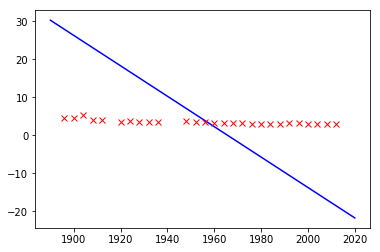

In [24]:
plt.plot(x_test, f_test, 'b-')
plt.plot(x, y, 'rx')

The fit isn't very good, we need to iterate between these parameter
updates in a loop to improve the fit, we have to do this several times,

In [25]:
for i in np.arange(10):
    m = ((y - c)*x).sum()/(x*x).sum()
    c = (y-m*x).sum()/y.shape[0]
print(m)
print(c)

-0.3987259642505432
783.5273797273478


And let's try plotting the result again

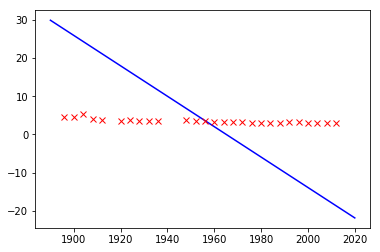

In [26]:
f_test = m*x_test + c
plt.plot(x_test, f_test, 'b-')
plt.plot(x, y, 'rx')

Clearly we need more iterations than 10! In the next question you will
add more iterations and report on the error as optimisation proceeds.

### Question 3

There is a problem here, we seem to need many interations to get to a
good solution. Let's explore what's going on. Write code which
alternates between updates of `c` and `m`. Include the following
features in your code.

1.  Initialise with `m=-0.4` and `c=80`.
2.  Every 10 iterations compute the value of the objective function for
    the training data and print it to the screen (you'll find hints on
    this in [the lab from last week](./week2.ipynb).
3.  Cause the code to stop running when the error change over less than
    10 iterations is smaller than $1\times10^{-4}$. This is known as a
    stopping criterion.

Why do we need so many iterations to get to the solution?

*25 marks*

In [27]:
# Write your answer to Question 3 here

### Important Concepts Not Covered

-   Other optimization methods:
    -   Second order methods, conjugate gradient, quasi-Newton and
        Newton.
-   Effective heuristics such as momentum.
-   Local vs global solutions.

### Reading

-   Section 1.1-1.2 of @Rogers:book11 for fitting linear models.
-   Section 1.2.5 of @Bishop:book06 up to equation 1.65.

## Multiple Input Solution with Linear Algebra

You've now seen how slow it can be to perform a coordinate ascent on a
system. Another approach to solving the system (which is not always
possible, particularly in *non-linear* systems) is to go direct to the
minimum. To do this we need to introduce *linear algebra*. We will
represent all our errors and functions in the form of linear algebra. As
we mentioned above, linear algebra is just a shorthand for performing
lots of multiplications and additions simultaneously. What does it have
to do with our system then? Well the first thing to note is that the
linear function we were trying to fit has the following form: $$
\mappingFunction(x) = mx + c
$$ the classical form for a straight line. From a linear algebraic
perspective we are looking for multiplications and additions. We are
also looking to separate our parameters from our data. The data is the
*givens* remember, in French the word is données literally translated
means *givens* that's great, because we don't need to change the data,
what we need to change are the parameters (or variables) of the model.
In this function the data comes in through $x$, and the parameters are
$m$ and $c$.

What we'd like to create is a vector of parameters and a vector of data.
Then we could represent the system with vectors that represent the data,
and vectors that represent the parameters.

We look to turn the multiplications and additions into a linear
algebraic form, we have one multiplication ($m\times c$ and one addition
($mx + c$). But we can turn this into a inner product by writing it in
the following way, $$
\mappingFunction(x) = m \times x +
c \times 1,
$$ in other words we've extracted the unit value, from the offset, $c$.
We can think of this unit value like an extra item of data, because it
is always given to us, and it is always set to 1 (unlike regular data,
which is likely to vary!). We can therefore write each input data
location, $\inputVector$, as a vector $$
\inputVector = \begin{bmatrix} 1\\ x\end{bmatrix}.
$$

Now we choose to also turn our parameters into a vector. The parameter
vector will be defined to contain $$
\mappingVector = \begin{bmatrix} c \\ m\end{bmatrix}
$$ because if we now take the inner product between these to vectors we
recover $$
\inputVector\cdot\mappingVector = 1 \times c + x \times m = mx + c
$$ In `numpy` we can define this vector as follows

In [28]:
# define the vector w
w = np.zeros(shape=(2, 1))
w[0] = m
w[1] = c

This gives us the equivalence between original operation and an
operation in vector space. Whilst the notation here isn't a lot shorter,
the beauty is that we will be able to add as many features as we like
and still keep the seame representation. In general, we are now moving
to a system where each of our predictions is given by an inner product.
When we want to represent a linear product in linear algebra, we tend to
do it with the transpose operation, so since we have
$\mathbf{a}\cdot\mathbf{b} = \mathbf{a}^\top\mathbf{b}$ we can write $$
\mappingFunction(\inputVector_i) = \inputVector_i^\top\mappingVector.
$$ Where we've assumed that each data point, $\inputVector_i$, is now
written by appending a 1 onto the original vector $$
\inputVector_i = \begin{bmatrix} 
1 \\
\inputScalar_i
\end{bmatrix}
$$

## Design Matrix

We can do this for the entire data set to form a [*design
matrix*](http://en.wikipedia.org/wiki/Design_matrix) $\inputMatrix$,

$$\inputMatrix
= \begin{bmatrix} 
\inputVector_1^\top \\\ 
\inputVector_2^\top \\\ 
\vdots \\\
\inputVector_\numData^\top
\end{bmatrix} = \begin{bmatrix}
1 & \inputScalar_1 \\\
1 & \inputScalar_2 \\\
\vdots
& \vdots \\\
1 & \inputScalar_\numData 
\end{bmatrix},$$

which in `numpy` can be done with the following commands:

In [29]:
X = np.hstack((np.ones_like(x), x))
print(X)

[[1.000e+00 1.896e+03]
 [1.000e+00 1.900e+03]
 [1.000e+00 1.904e+03]
 [1.000e+00 1.908e+03]
 [1.000e+00 1.912e+03]
 [1.000e+00 1.920e+03]
 [1.000e+00 1.924e+03]
 [1.000e+00 1.928e+03]
 [1.000e+00 1.932e+03]
 [1.000e+00 1.936e+03]
 [1.000e+00 1.948e+03]
 [1.000e+00 1.952e+03]
 [1.000e+00 1.956e+03]
 [1.000e+00 1.960e+03]
 [1.000e+00 1.964e+03]
 [1.000e+00 1.968e+03]
 [1.000e+00 1.972e+03]
 [1.000e+00 1.976e+03]
 [1.000e+00 1.980e+03]
 [1.000e+00 1.984e+03]
 [1.000e+00 1.988e+03]
 [1.000e+00 1.992e+03]
 [1.000e+00 1.996e+03]
 [1.000e+00 2.000e+03]
 [1.000e+00 2.004e+03]
 [1.000e+00 2.008e+03]
 [1.000e+00 2.012e+03]]


### Writing the Objective with Linear Algebra

When we think of the objective function, we can think of it as the
errors where the error is defined in a similar way to what it was in
Legendre's day $\dataScalar_i - \mappingFunction(\inputVector_i)$, in
statistics these errors are also sometimes called
[*residuals*](http://en.wikipedia.org/wiki/Errors_and_residuals_in_statistics).
So we can think as the objective and the prediction function as two
separate parts, first we have, $$
\errorFunction(\mappingVector) = \sum_{i=1}^\numData (\dataScalar_i - \mappingFunction(\inputVector_i; \mappingVector))^2,
$$ where we've made the function $\mappingFunction(\cdot)$'s dependence
on the parameters $\mappingVector$ explicit in this equation. Then we
have the definition of the function itself, $$
\mappingFunction(\inputVector_i; \mappingVector) = \inputVector_i^\top \mappingVector.
$$ Let's look again at these two equations and see if we can identify
any inner products. The first equation is a sum of squares, which is
promising. Any sum of squares can be represented by an inner product, $$
a = \sum_{i=1}^{k} b^2_i = \mathbf{b}^\top\mathbf{b},
$$ so if we wish to represent $\errorFunction(\mappingVector)$ in this
way, all we need to do is convert the sum operator to an inner product.
We can get a vector from that sum operator by placing both
$\dataScalar_i$ and $\mappingFunction(\inputVector_i; \mappingVector)$
into vectors, which we do by defining $$
\dataVector = \begin{bmatrix}\dataScalar_1\\ \dataScalar_2\\ \vdots \\ \dataScalar_\numData\end{bmatrix}
$$ and defining $$
\mappingFunctionVector(\inputVector_1; \mappingVector) = \begin{bmatrix}\mappingFunction(\inputVector_1; \mappingVector)\\ \mappingFunction(\inputVector_2; \mappingVector)\\ \vdots \\ \mappingFunction(\inputVector_\numData; \mappingVector)\end{bmatrix}.
$$ The second of these is actually a vector-valued function. This term
may appear intimidating, but the idea is straightforward. A vector
valued function is simply a vector whose elements are themselves defined
as *functions*, i.e. it is a vector of functions, rather than a vector
of scalars. The idea is so straightforward, that we are going to ignore
it for the moment, and barely use it in the derivation. But it will
reappear later when we introduce *basis functions*. So we will, for the
moment, ignore the dependence of $\mappingFunctionVector$ on
$\mappingVector$ and $\inputMatrix$ and simply summarise it by a vector
of numbers $$
\mappingFunctionVector = \begin{bmatrix}\mappingFunction_1\\\mappingFunction_2\\
\vdots \\ \mappingFunction_\numData\end{bmatrix}.
$$ This allows us to write our objective in the folowing, linear
algebraic form, $$
\errorFunction(\mappingVector) = (\dataVector - \mappingFunctionVector)^\top(\dataVector - \mappingFunctionVector)
$$ from the rules of inner products. But what of our matrix
$\inputMatrix$ of input data? At this point, we need to dust off
[*matrix-vector
multiplication*](http://en.wikipedia.org/wiki/Matrix_multiplication).
Matrix multiplication is simply a convenient way of performing many
inner products together, and it's exactly what we need to summarise the
operation $$
f_i = \inputVector_i^\top\mappingVector.
$$ This operation tells us that each element of the vector
$\mappingFunctionVector$ (our vector valued function) is given by an
inner product between $\inputVector_i$ and $\mappingVector$. In other
words it is a series of inner products. Let's look at the definition of
matrix multiplication, it takes the form $$
\mathbf{c} = \mathbf{B}\mathbf{a}
$$ where $\mathbf{c}$ might be a $k$ dimensional vector (which we can
intepret as a $k\times 1$ dimensional matrix), and $\mathbf{B}$ is a
$k\times k$ dimensional matrix and $\mathbf{a}$ is a $k$ dimensional
vector ($k\times 1$ dimensional matrix).

The result of this multiplication is of the form $$
\begin{bmatrix}c_1\\c_2 \\ \vdots \\
a_k\end{bmatrix} = 
\begin{bmatrix} b_{1,1} & b_{1, 2} & \dots & b_{1, k} \\
b_{2, 1} & b_{2, 2} & \dots & b_{2, k} \\
\vdots & \vdots & \ddots & \vdots \\
b_{k, 1} & b_{k, 2} & \dots & b_{k, k} \end{bmatrix} \begin{bmatrix}a_1\\a_2 \\
\vdots\\ c_k\end{bmatrix} = \begin{bmatrix} b_{1, 1}a_1 + b_{1, 2}a_2 + \dots +
b_{1, k}a_k\\
b_{2, 1}a_1 + b_{2, 2}a_2 + \dots + b_{2, k}a_k \\ 
\vdots\\
b_{k, 1}a_1 + b_{k, 2}a_2 + \dots + b_{k, k}a_k\end{bmatrix}
$$ so we see that each element of the result, $\mathbf{a}$ is simply the
inner product between each *row* of $\mathbf{B}$ and the vector
$\mathbf{c}$. Because we have defined each element of
$\mappingFunctionVector$ to be given by the inner product between each
*row* of the design matrix and the vector $\mappingVector$ we now can
write the full operation in one matrix multiplication, $$
\mappingFunctionVector = \inputMatrix\mappingVector.
$$

In [30]:
f = np.dot(X, w) # np.dot does matrix multiplication in python

Combining this result with our objective function, $$
\errorFunction(\mappingVector) = (\dataVector - \mappingFunctionVector)^\top(\dataVector - \mappingFunctionVector)
$$ we find we have defined the *model* with two equations. One equation
tells us the form of our predictive function and how it depends on its
parameters, the other tells us the form of our objective function.

In [31]:
resid = (y-f)
E = np.dot(resid.T, resid) # matrix multiplication on a single vector is equivalent to a dot product.
print("Error function is:", E)

Error function is: [[6.34574157e+13]]


### Question 4

The prediction for our movie recommender system had the form $$
f_{i,j} = \mathbf{u}_i^\top \mathbf{v}_j
$$ and the objective function was then $$
E = \sum_{i,j} s_{i,j}(\dataScalar_{i,j} - f_{i, j})^2
$$ Try writing this down in matrix and vector form. How many of the
terms can you do? For each variable and parameter carefully think about
whether it should be represented as a matrix or vector. Do as many of
the terms as you can. Use $\LaTeX$ to give your answers and give the
*dimensions* of any matrices you create.

*20 marks*

### Write your answer to Question 4 here

## Objective Optimisation

Our *model* has now been defined with two equations, the prediction
function and the objective function. Next we will use multivariate
calculus to define an *algorithm* to fit the model. The separation
between model and algorithm is important and is often overlooked. Our
model contains a function that shows how it will be used for prediction,
and a function that describes the objective function we need to optimise
to obtain a good set of parameters.

The model linear regression model we have described is still the same as
the one we fitted above with a coordinate ascent algorithm. We have only
played with the notation to obtain the same model in a matrix and vector
notation. However, we will now fit this model with a different
algorithm, one that is much faster. It is such a widely used algorithm
that from the end user's perspective it doesn't even look like an
algorithm, it just appears to be a single operation (or function).
However, underneath the computer calls an algorithm to find the
solution. Further, the algorithm we obtain is very widely used, and
because of this it turns out to be highly optimised.

Once again we are going to try and find the stationary points of our
objective by finding the *stationary points*. However, the stationary
points of a multivariate function, are a little bit more complext to
find. Once again we need to find the point at which the derivative is
zero, but now we need to use *multivariate calculus* to find it. This
involves learning a few additional rules of differentiation (that allow
you to do the derivatives of a function with respect to vector), but in
the end it makes things quite a bit easier. We define vectorial
derivatives as follows, $$
\frac{\text{d}\errorFunction(\mappingVector)}{\text{d}\mappingVector} =
\begin{bmatrix}\frac{\text{d}\errorFunction(\mappingVector)}{\text{d}\mappingScalar_1}\\\frac{\text{d}\errorFunction(\mappingVector)}{\text{d}\mappingScalar_2}\end{bmatrix}.
$$ where
$\frac{\text{d}\errorFunction(\mappingVector)}{\text{d}\mappingScalar_1}$
is the [partial
derivative](http://en.wikipedia.org/wiki/Partial_derivative) of the
error function with respect to $\mappingScalar_1$.

Differentiation through multiplications and additions is relatively
straightforward, and since linear algebra is just multiplication and
addition, then its rules of diffentiation are quite straightforward too,
but slightly more complex than regular derivatives.

### Multivariate Derivatives

We will need two rules of multivariate or *matrix* differentiation. The
first is diffentiation of an inner product. By remembering that the
inner product is made up of multiplication and addition, we can hope
that its derivative is quite straightforward, and so it proves to be. We
can start by thinking about the definition of the inner product, $$
\mathbf{a}^\top\mathbf{z} = \sum_{i} a_i
z_i,
$$ which if we were to take the derivative with respect to $z_k$ would
simply return the gradient of the one term in the sum for which the
derivative was non zero, that of $a_k$, so we know that $$
\frac{\text{d}}{\text{d}z_k} \mathbf{a}^\top \mathbf{z} = a_k
$$ and by our definition of multivariate derivatives we can simply stack
all the partial derivatives of this form in a vector to obtain the
result that $$
\frac{\text{d}}{\text{d}\mathbf{z}}
\mathbf{a}^\top \mathbf{z} = \mathbf{a}.
$$ The second rule that's required is differentiation of a 'matrix
quadratic'. A scalar quadratic in $z$ with coefficient $c$ has the form
$cz^2$. If $\mathbf{z}$ is a $k\times 1$ vector and $\mathbf{C}$ is a
$k \times k$ *matrix* of coefficients then the matrix quadratic form is
written as $\mathbf{z}^\top \mathbf{C}\mathbf{z}$, which is itself a
*scalar* quantity, but it is a function of a *vector*.

#### Matching Dimensions in Matrix Multiplications

There's a trick for telling that it's a scalar result. When you are
doing maths with matrices, it's always worth pausing to perform a quick
sanity check on the dimensions. Matrix multplication only works when the
dimensions match. To be precise, the 'inner' dimension of the matrix
must match. What is the inner dimension. If we multiply two matrices
$\mathbf{A}$ and $\mathbf{B}$, the first of which has $k$ rows and
$\ell$ columns and the second of which has $p$ rows and $q$ columns,
then we can check whether the multiplication works by writing the
dimensionalities next to each other, $$
\mathbf{A} \mathbf{B} \rightarrow (k \times
\underbrace{\ell)(p}_\text{inner dimensions} \times q) \rightarrow (k\times q).
$$ The inner dimensions are the two inside dimensions, $\ell$ and $p$.
The multiplication will only work if $\ell=p$. The result of the
multiplication will then be a $k\times q$ matrix: this dimensionality
comes from the 'outer dimensions'. Note that matrix multiplication is
not [*commutative*](http://en.wikipedia.org/wiki/Commutative_property).
And if you change the order of the multiplication, $$
\mathbf{B} \mathbf{A} \rightarrow (\ell \times \underbrace{k)(q}_\text{inner dimensions} \times p) \rightarrow (\ell \times p).
$$ firstly it may no longer even work, because now the condition is that
$k=q$, and secondly the result could be of a different dimensionality.
An exception is if the matrices are square matrices (e.g. same number of
rows as columns) and they are both *symmetric*. A symmetric matrix is
one for which $\mathbf{A}=\mathbf{A}^\top$, or equivalently,
$a_{i,j} = a_{j,i}$ for all $i$ and $j$.

You will need to get used to working with matrices and vectors applying
and developing new machine learning techniques. You should have come
across them before, but you may not have used them as extensively as we
will now do in this course. You should get used to using this trick to
check your work and ensure you know what the dimension of an output
matrix should be. For our matrix quadratic form, it turns out that we
can see it as a special type of inner product. $$
\mathbf{z}^\top\mathbf{C}\mathbf{z} \rightarrow (1\times
\underbrace{k) (k}_\text{inner dimensions}\times k) (k\times 1) \rightarrow
\mathbf{b}^\top\mathbf{z}
$$ where $\mathbf{b} = \mathbf{C}\mathbf{z}$ so therefore the result is
a scalar, $$
\mathbf{b}^\top\mathbf{z} \rightarrow
(1\times \underbrace{k) (k}_\text{inner dimensions}\times 1) \rightarrow
(1\times 1)
$$ where a $(1\times 1)$ matrix is recognised as a scalar.

This implies that we should be able to differentiate this form, and
indeed the rule for its differentiation is slightly more complex than
the inner product, but still quite simple, $$
\frac{\text{d}}{\text{d}\mathbf{z}}
\mathbf{z}^\top\mathbf{C}\mathbf{z}= \mathbf{C}\mathbf{z} + \mathbf{C}^\top
\mathbf{z}.
$$ Note that in the special case where $\mathbf{C}$ is symmetric then we
have $\mathbf{C} = \mathbf{C}^\top$ and the derivative simplifies to $$
\frac{\text{d}}{\text{d}\mathbf{z}} \mathbf{z}^\top\mathbf{C}\mathbf{z}=
2\mathbf{C}\mathbf{z}.
$$

### Differentiate the Objective

First, we need to compute the full objective by substituting our
prediction function into the objective function to obtain the objective
in terms of $\mappingVector$. Doing this we obtain $$
\errorFunction(\mappingVector)= (\dataVector - \inputMatrix\mappingVector)^\top (\dataVector - \inputMatrix\mappingVector).
$$ We now need to differentiate this *quadratic form* to find the
minimum. We differentiate with respect to the *vector* $\mappingVector$.
But before we do that, we'll expand the brackets in the quadratic form
to obtain a series of scalar terms. The rules for bracket expansion
across the vectors are similar to those for the scalar system giving, $$
(\mathbf{a} - \mathbf{b})^\top
(\mathbf{c} - \mathbf{d}) = \mathbf{a}^\top \mathbf{c} - \mathbf{a}^\top
\mathbf{d} - \mathbf{b}^\top \mathbf{c} + \mathbf{b}^\top \mathbf{d}
$$ which substituting for $\mathbf{a} = \mathbf{c} = \dataVector$ and
$\mathbf{b}=\mathbf{d} = \inputMatrix\mappingVector$ gives $$
\errorFunction(\mappingVector)=
\dataVector^\top\dataVector - 2\dataVector^\top\inputMatrix\mappingVector +
\mappingVector^\top\inputMatrix^\top\inputMatrix\mappingVector
$$ where we used the fact that
$\dataVector^\top\inputMatrix\mappingVector=\mappingVector^\top\inputMatrix^\top\dataVector$.
Now we can use our rules of differentiation to compute the derivative of
this form, which is, $$
\frac{\text{d}}{\text{d}\mappingVector}\errorFunction(\mappingVector)=- 2\inputMatrix^\top \dataVector +
2\inputMatrix^\top\inputMatrix\mappingVector,
$$ where we have exploited the fact that $\inputMatrix^\top\inputMatrix$
is symmetric to obtain this result.

### Question 5

Use the equivalence between our vector and our matrix formulations of
linear regression, alongside our definition of vector derivates, to
match the gradients we've computed directly for
$\frac{\text{d}\errorFunction(c, m)}{\text{d}c}$ and
$\frac{\text{d}\errorFunction(c, m)}{\text{d}m}$ to those for
$\frac{\text{d}\errorFunction(\mappingVector)}{\text{d}\mappingVector}$.

*20 marks*

### Write your answer to Question 5 here

## Update Equation for Global Optimum

Once again, we need to find the minimum of our objective function. Using
our likelihood for multiple input regression we can now minimize for our
parameter vector $\mappingVector$. Firstly, just as in the single input
case, we seek stationary points by find parameter vectors that solve for
when the gradients are zero, $$
\mathbf{0}=- 2\inputMatrix^\top
\dataVector + 2\inputMatrix^\top\inputMatrix\mappingVector,
$$ where $\mathbf{0}$ is a *vector* of zeros. Rearranging this equation
we find the solution to be $$
\mappingVector = \left[\inputMatrix^\top \inputMatrix\right]^{-1} \inputMatrix^\top
\dataVector
$$ where $\mathbf{A}^{-1}$ denotes [*matrix
inverse*](http://en.wikipedia.org/wiki/Invertible_matrix).

### Solving the Multivariate System

The solution for $\mappingVector$ is given in terms of a matrix inverse,
but computation of a matrix inverse requires, in itself, an algorithm to
resolve it. You'll know this if you had to invert, by hand, a
$3\times 3$ matrix in high school. From a numerical stability
perspective, it is also best not to compute the matrix inverse directly,
but rather to ask the computer to *solve* the system of linear equations
given by
$$\inputMatrix^\top\inputMatrix \mappingVector = \inputMatrix^\top\dataVector$$
for $\mappingVector$. This can be done in `numpy` using the command

In [32]:
np.linalg.solve?

so we can obtain the solution using

In [33]:
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))
print(w)

[[ 2.88952457e+01]
 [-1.29806477e-02]]


We can map it back to the liner regression and plot the fit as follows

[-0.01298065]
[28.89524574]


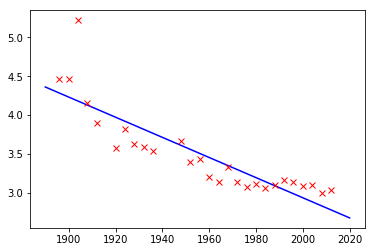

In [34]:
m = w[1]; c=w[0]
f_test = m*x_test + c
print(m)
print(c)
plt.plot(x_test, f_test, 'b-')
plt.plot(x, y, 'rx')

### Multivariate Linear Regression

A major advantage of the new system is that we can build a linear
regression on a multivariate system. The matrix calculus didn't specify
what the length of the vector $\inputVector$ should be, or equivalently
the size of the design matrix.

### Movie Body Count Data

Let's consider the movie body count data.

In [35]:
data = pods.datasets.movie_body_count()
movies = data['Y']

Acquiring resource: movie_body_count

Details of data: 
Data scraped from www.MovieBodyCounts.com and www.imdb.com using scripts provided on a github repository (in both Python and R) at https://github.com/morpionZ/R-vs-Python/tree/master/Deadliest%20movies%20scrape/code. This script pulls down the scraped data.

Please cite:
Simon Garnier and Randy Olson, Blog Post: R vs Python Round 2, February 2nd 2014 (http://www.theswarmlab.com/r-vs-python-round-2-22/)

After downloading the data will take up 536272 bytes of space.

Data will be stored in /home/mike/ods_data_cache/movie_body_count.

Do you wish to proceed with the download? [yes/no]
yes
[==============================]   0.366/0.366MB                                                                                                                                                                                                                                                                                                              

Let's remind ourselves of the features we've been provided with.

In [36]:
print(', '.join(movies.columns))

Film, Year, Body_Count, MPAA_Rating, Genre, Director, Actors, Length_Minutes, IMDB_Rating


Now we will build a design matrix based on the numeric features: year,
Body\_Count, Length\_Minutes in an effort to predict the rating. We
build the design matrix as follows:

### Relation to Single Input System

Bias as an additional feature.

In [38]:
select_features = ['Year', 'Body_Count', 'Length_Minutes']
X = movies[select_features]
X['Eins'] = 1 # add a column for the offset
y = movies[['IMDB_Rating']]

 /home/mike/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Now let's perform a linear regression. But this time, we will create a
pandas data frame for the result so we can store it in a form that we
can visualise easily.

In [39]:
import pandas as pd
w = pd.DataFrame(data=np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y)),  # solve linear regression here
                 index = X.columns,  # columns of X become rows of w
                 columns=['regression_coefficient']) # the column of X is the value of regression coefficient

We can check the residuals to see how good our estimates are

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f16291ebb70>]],
      dtype=object)

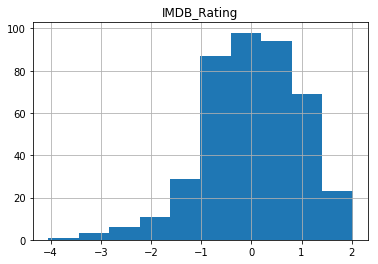

In [40]:
(y - np.dot(X, w)).hist()

Which shows our model *hasn't* yet done a great job of representation,
because the spread of values is large. We can check what the rating is
dominated by in terms of regression coefficients.

In [41]:
w

,regression_coefficient
Year,-0.016280
Body_Count,-0.000995
Length_Minutes,0.025386
Eins,36.508363


Although we have to be a little careful about interpretation because our
input values live on different scales, however it looks like we are
dominated by the bias, with a small negative effect for later films (but
bear in mind the years are large, so this effect is probably larger than
it looks) and a positive effect for length. So it looks like long
earlier films generally do better, but the residuals are so high that we
probably haven't modelled the system very well.

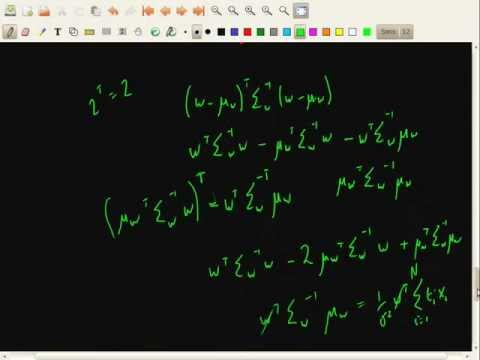

In [42]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('ui-uNlFHoms')

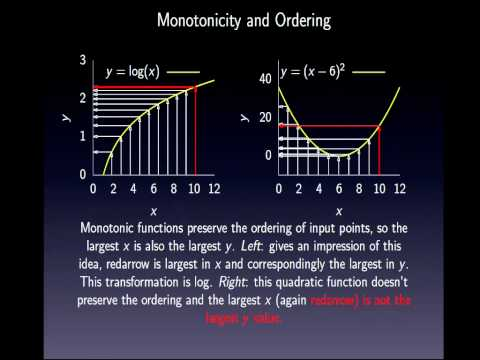

In [43]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('78YNphT90-k')

### Solution with QR Decomposition

Performing a solve instead of a matrix inverse is the more numerically
stable approach, but we can do even better. A
[QR-decomposition](http://en.wikipedia.org/wiki/QR_decomposition) of a
matrix factorises it into a matrix which is an orthogonal matrix
$\mathbf{Q}$, so that $\mathbf{Q}^\top \mathbf{Q} = \eye$. And a matrix
which is upper triangular, $\mathbf{R}$. $$
\inputMatrix^\top \inputMatrix \boldsymbol{\beta} =
\inputMatrix^\top \dataVector
$$ $$
(\mathbf{Q}\mathbf{R})^\top
(\mathbf{Q}\mathbf{R})\boldsymbol{\beta} = (\mathbf{Q}\mathbf{R})^\top
\dataVector
$$ $$
\mathbf{R}^\top (\mathbf{Q}^\top \mathbf{Q}) \mathbf{R}
\boldsymbol{\beta} = \mathbf{R}^\top \mathbf{Q}^\top \dataVector
$$ $$
\mathbf{R}^\top \mathbf{R} \boldsymbol{\beta} = \mathbf{R}^\top \mathbf{Q}^\top
\dataVector
$$ $$
\mathbf{R} \boldsymbol{\beta} = \mathbf{Q}^\top \dataVector
$$ This is a more numerically stable solution because it removes the
need to compute $\inputMatrix^\top\inputMatrix$ as an intermediate.
Computing $\inputMatrix^\top\inputMatrix$ is a bad idea because it
involves squaring all the elements of $\inputMatrix$ and thereby
potentially reducing the numerical precision with which we can represent
the solution. Operating on $\inputMatrix$ directly preserves the
numerical precision of the model.

This can be more particularly seen when we begin to work with *basis
functions* in the next session. Some systems that can be resolved with
the QR decomposition can not be resolved by using solve directly.

In [44]:
import scipy as sp
Q, R = np.linalg.qr(X)
w = sp.linalg.solve_triangular(R, np.dot(Q.T, y)) 
w = pd.DataFrame(w, index=X.columns)
w

,0
Year,-0.016280
Body_Count,-0.000995
Length_Minutes,0.025386
Eins,36.508363


### Reading

-   Section 1.3 of @Rogers:book11 for Matrix & Vector Review.

## Underdetermined System

In [45]:
import teaching_plots as plot

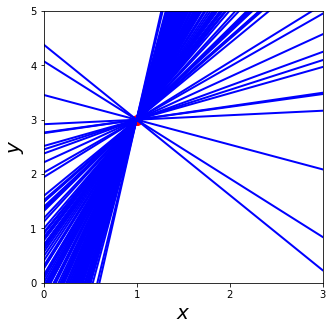

In [47]:
plot.under_determined_system(diagrams='')

What about the situation where you have more parameters than data in
your simultaneous equation? This is known as an *underdetermined*
system. In fact this set up is in some sense *easier* to solve, because
we don't need to think about introducing a slack variable (although it
might make a lot of sense from a *modelling* perspective to do so).

The way Laplace proposed resolving an overdetermined system, was to
introduce slack variables, $\noiseScalar_i$, which needed to be
estimated for each point. The slack variable represented the difference
between our actual prediction and the true observation. This is known as
the *residual*. By introducing the slack variable we now have an
additional $n$ variables to estimate, one for each data point,
$\{\noiseScalar_i\}$. This actually turns the overdetermined system into
an underdetermined system. Introduction of $n$ variables, plus the
original $m$ and $c$ gives us $\numData+2$ parameters to be estimated
from $n$ observations, which actually makes the system
*underdetermined*. However, we then made a probabilistic assumption
about the slack variables, we assumed that the slack variables were
distributed according to a probability density. And for the moment we
have been assuming that density was the Gaussian,
$$\noiseScalar_i \sim \gaussianSamp{0}{\dataStd^2},$$ with zero mean and
variance $\dataStd^2$.

The follow up question is whether we can do the same thing with the
parameters. If we have two parameters and only one unknown can we place
a probability distribution over the parameters, as we did with the slack
variables? The answer is yes.

### Underdetermined System

In [48]:
import pods
from ipywidgets import IntSlider

In [50]:
#pods.notebook.display_plots('under_determined_system{samp:0>3}.svg', 
#                            directory='', samp=IntSlider(0, 0, 10, 1))

<center>
*Fit underdetermined system by considering uncertainty *
</center>
### Basis Functions

Here's the idea, instead of working directly on the original input
space, $\inputVector$, we build models in a new space,
$\basisVector(\inputVector)$ where $\basisVector(\cdot)$ is a
*vector-valued* function that is defined on the space $\inputVector$.

### Quadratic Basis

Remember, that a *vector-valued function* is just a vector that contains
functions instead of values. Here's an example for a one dimensional
input space, $x$, being projected to a *quadratic* basis. First we
consider each basis function in turn, we can think of the elements of
our vector as being indexed so that we have $$
\begin{align*}
\basisFunc_1(\inputScalar) = 1, \\
\basisFunc_2(\inputScalar) = x, \\
\basisFunc_3(\inputScalar) = \inputScalar^2.
\end{align*}
$$ Now we can consider them together by placing them in a vector, $$
\basisVector(\inputScalar) = \begin{bmatrix} 1\\ x \\ \inputScalar^2\end{bmatrix}.
$$ For the vector-valued function, we have simply collected the
different functions together in the same vector making them notationally
easier to deal with in our mathematics.

When we consider the vector-valued function for each data point, then we
place all the data into a matrix. The result is a matrix valued
function, $$
\basisMatrix(\inputVector) = 
\begin{bmatrix} 1 & \inputScalar_1 &
\inputScalar_1^2 \\
1 & \inputScalar_2 & \inputScalar_2^2\\
\vdots & \vdots & \vdots \\
1 & \inputScalar_n & \inputScalar_n^2
\end{bmatrix}
$$ where we are still in the one dimensional input setting so
$\inputVector$ here represents a vector of our inputs with $\numData$
elements.

Let's try constructing such a matrix for a set of inputs. First of all,
we create a function that returns the matrix valued function

In [51]:
import numpy as np

In [52]:
def quadratic(x, **kwargs):
    """Take in a vector of input values and return the design matrix associated 
    with the basis functions."""
    return np.hstack([np.ones((x.shape[0], 1)), x, x**2])

### Functions Derived from Quadratic Basis

$$
\mappingFunction(\inputScalar) = {\color{cyan}\mappingScalar_0}   + {\color{green}\mappingScalar_1 \inputScalar} + {\color{yellow}\mappingScalar_2 \inputScalar^2}
$$

In [53]:
import matplotlib.pyplot as plt
import teaching_plots as plot

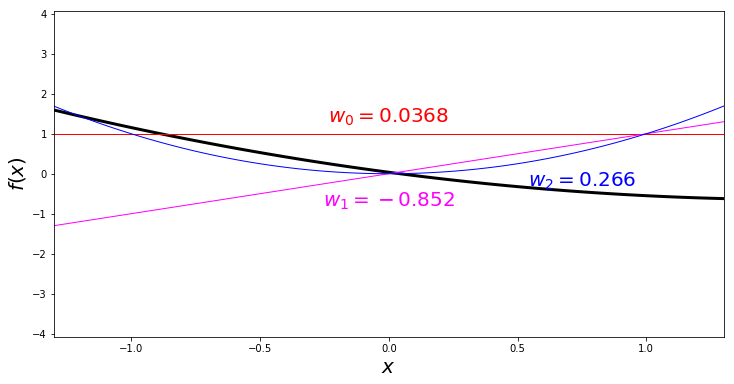

In [55]:
f, ax = plt.subplots(figsize=plot.big_wide_figsize)
loc =[[0, 1.4,],
      [0, -0.7],
      [0.75, -0.2]]
text =['$\phi(x) = 1$',
       '$\phi(x) = x$',
       '$\phi(x) = x^2$']

plot.basis(quadratic, x_min=-1.3, x_max=1.3, 
           fig=f, ax=ax, loc=loc, text=text,
           diagrams='')

In [56]:
import pods
from ipywidgets import IntSlider

In [58]:
#pods.notebook.display_plots('quadratic_basis{num_basis:0>3}.svg', 
#                           directory='', 
#                            num_basis=IntSlider(0,0,2,1))

This function takes in an $\numData \times 1$ dimensional vector and
returns an $\numData \times 3$ dimensional *design matrix* containing
the basis functions. We can plot those basis functions against there
input as follows.

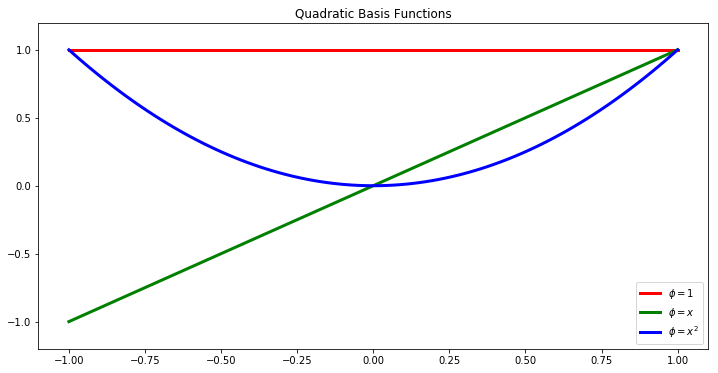

In [59]:
# first let's generate some inputs
n = 100
x = np.zeros((n, 1))  # create a data set of zeros
x[:, 0] = np.linspace(-1, 1, n) # fill it with values between -1 and 1

Phi = quadratic(x)

fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
ax.set_ylim([-1.2, 1.2]) # set y limits to ensure basis functions show.
ax.plot(x[:,0], Phi[:, 0], 'r-', label = '$\phi=1$', linewidth=3)
ax.plot(x[:,0], Phi[:, 1], 'g-', label = '$\phi=x$', linewidth=3)
ax.plot(x[:,0], Phi[:, 2], 'b-', label = '$\phi=x^2$', linewidth=3)
ax.legend(loc='lower right')
_ = ax.set_title('Quadratic Basis Functions')

The actual function we observe is then made up of a sum of these
functions. This is the reason for the name basis. The term *basis* means
'the underlying support or foundation for an idea, argument, or
process', and in this context they form the underlying support for our
prediction function. Our prediction function can only be composed of a
weighted linear sum of our basis functions.

### Quadratic Functions

In [60]:
import pods
from ipywidgets import IntSlider

In [63]:
#pods.notebook.display_plots('quadratic_function{num_function:0>3}.svg', 
#                            directory='', 
#                            num_basis=IntSlider(0,0,2,1))

### Alan Turing

<table>
<tr>
<td width="50%">
<img class="" src="turing-times.gif" width="" align="center" style="background:none; border:none; box-shadow:none;">
</td>
<td width="50%">
<img class="" src="turing-run.jpg" width="" align="center" style="background:none; border:none; box-shadow:none;">
</td>
</tr>
</table>
<center>
*Alan Turing, in 1946 he was only 11 minutes slower than the winner of
the 1948 games. Would he have won a hypothetical games held in 1946?
Source: [Alan Turing Internet
Scrapbook](http://www.turing.org.uk/scrapbook/run.html).*
</center>
If we had to summarise the objectives of machine learning in one word, a
very good candidate for that word would be *generalization*. What is
generalization? From a human perspective it might be summarised as the
ability to take lessons learned in one domain and apply them to another
domain. If we accept the definition given in the first session for
machine learning, $$
\text{data} + \text{model} \xrightarrow{\text{compute}} \text{prediction}
$$ then we see that without a model we can't generalise: we only have
data. Data is fine for answering very specific questions, like "Who won
the Olympic Marathon in 2012?", because we have that answer stored,
however, we are not given the answer to many other questions. For
example, Alan Turing was a formidable marathon runner, in 1946 he ran a
time 2 hours 46 minutes (just under four minutes per kilometer, faster
than I and most of the other [Endcliffe Park
Run](http://www.parkrun.org.uk/sheffieldhallam/) runners can do 5 km).
What is the probability he would have won an Olympics if one had been
held in 1946?

To answer this question we need to generalize, but before we formalize
the concept of generalization let's introduce some formal representation
of what it means to generalize in machine learning.

<center>
*Combining a Gaussian likelihood with a Gaussian prior to form a
Gaussian posterior *
</center>
### Main Trick

$$p(c) = \frac{1}{\sqrt{2\pi\alpha_1}} \exp\left(-\frac{1}{2\alpha_1}c^2\right)$$
$$p(\dataVector|\inputVector, c, m, \dataStd^2) = \frac{1}{\left(2\pi\dataStd^2\right)^{\frac{\numData}{2}}} \exp\left(-\frac{1}{2\dataStd^2}\sum_{i=1}^\numData(\dataScalar_i - m\inputScalar_i - c)^2\right)$$

### 

$$p(c| \dataVector, \inputVector, m, \dataStd^2) = \frac{p(\dataVector|\inputVector, c, m, \dataStd^2)p(c)}{p(\dataVector|\inputVector, m, \dataStd^2)}$$

$$p(c| \dataVector, \inputVector, m, \dataStd^2) =  \frac{p(\dataVector|\inputVector, c, m, \dataStd^2)p(c)}{\int p(\dataVector|\inputVector, c, m, \dataStd^2)p(c) \text{d} c}$$

### 

$$p(c| \dataVector, \inputVector, m, \dataStd^2) \propto  p(\dataVector|\inputVector, c, m, \dataStd^2)p(c)$$

$$\begin{aligned}
    \log p(c | \dataVector, \inputVector, m, \dataStd^2) =&-\frac{1}{2\dataStd^2} \sum_{i=1}^\numData(\dataScalar_i-c - m\inputScalar_i)^2-\frac{1}{2\alpha_1} c^2 + \text{const}\\
     = &-\frac{1}{2\dataStd^2}\sum_{i=1}^\numData(\dataScalar_i-m\inputScalar_i)^2 -\left(\frac{\numData}{2\dataStd^2} + \frac{1}{2\alpha_1}\right)c^2\\
    & + c\frac{\sum_{i=1}^\numData(\dataScalar_i-m\inputScalar_i)}{\dataStd^2},
  \end{aligned}$$

### 

complete the square of the quadratic form to obtain
$$\log p(c | \dataVector, \inputVector, m, \dataStd^2) = -\frac{1}{2\tau^2}(c - \mu)^2 +\text{const},$$
where $\tau^2 = \left(\numData\dataStd^{-2} +\alpha_1^{-1}\right)^{-1}$
and
$\mu = \frac{\tau^2}{\dataStd^2} \sum_{i=1}^\numData(\dataScalar_i-m\inputScalar_i)$.

### Two Dimensional Gaussian

-   Consider height, $h/m$ and weight, $w/kg$.
-   Could sample height from a distribution: $$
      p(h) \sim \gaussianSamp{1.7}{0.0225}
      $$
-   And similarly weight: $$
      p(w) \sim \gaussianSamp{75}{36}
      $$

<center>
*Samples from independent Gaussian variables that might represent
heights and weights. *
</center>
### Independence Assumption

-   This assumes height and weight are independent.
    $$p(h, w) = p(h)p(w)$$

-   In reality they are dependent (body mass index) $= \frac{w}{h^2}$.

<center>
*Samples from correlated Gaussian variables that might represent heights
and weights. *
</center>
### Independent Gaussians

$$
p(w, h) = p(w)p(h)
$$

$$
p(w, h) = \frac{1}{\sqrt{2\pi \dataStd_1^2}\sqrt{2\pi\dataStd_2^2}} \exp\left(-\frac{1}{2}\left(\frac{(w-\meanScalar_1)^2}{\dataStd_1^2} + \frac{(h-\meanScalar_2)^2}{\dataStd_2^2}\right)\right)
$$

$$
p(w, h) = \frac{1}{\sqrt{2\pi\dataStd_1^22\pi\dataStd_2^2}} \exp\left(-\frac{1}{2}\left(\begin{bmatrix}w \\ h\end{bmatrix} - \begin{bmatrix}\meanScalar_1 \\ \meanScalar_2\end{bmatrix}\right)^\top\begin{bmatrix}\dataStd_1^2& 0\\0&\dataStd_2^2\end{bmatrix}^{-1}\left(\begin{bmatrix}w \\ h\end{bmatrix} - \begin{bmatrix}\meanScalar_1 \\ \meanScalar_2\end{bmatrix}\right)\right)
$$

$$
p(\dataVector) = \frac{1}{\det{2\pi \mathbf{D}}^{\frac{1}{2}}} \exp\left(-\frac{1}{2}(\dataVector - \meanVector)^\top\mathbf{D}^{-1}(\dataVector - \meanVector)\right)
$$

### Correlated Gaussian

Form correlated from original by rotating the data space using matrix
$\rotationMatrix$.

$$
p(\dataVector) = \frac{1}{\det{2\pi\mathbf{D}}^{\frac{1}{2}}} \exp\left(-\frac{1}{2}(\dataVector - \meanVector)^\top\mathbf{D}^{-1}(\dataVector - \meanVector)\right)
$$

$$
p(\dataVector) = \frac{1}{\det{2\pi\mathbf{D}}^{\frac{1}{2}}} \exp\left(-\frac{1}{2}(\rotationMatrix^\top\dataVector - \rotationMatrix^\top\meanVector)^\top\mathbf{D}^{-1}(\rotationMatrix^\top\dataVector - \rotationMatrix^\top\meanVector)\right)
$$

$$
p(\dataVector) = \frac{1}{\det{2\pi\mathbf{D}}^{\frac{1}{2}}} \exp\left(-\frac{1}{2}(\dataVector - \meanVector)^\top\rotationMatrix\mathbf{D}^{-1}\rotationMatrix^\top(\dataVector - \meanVector)\right)
$$ this gives a covariance matrix: $$
\covarianceMatrix^{-1} = \rotationMatrix \mathbf{D}^{-1} \rotationMatrix^\top
$$

$$
p(\dataVector) = \frac{1}{\det{2\pi\covarianceMatrix}^{\frac{1}{2}}} \exp\left(-\frac{1}{2}(\dataVector - \meanVector)^\top\covarianceMatrix^{-1} (\dataVector - \meanVector)\right)
$$ this gives a covariance matrix: $$
\covarianceMatrix = \rotationMatrix \mathbf{D} \rotationMatrix^\top
$$

### Generating from the Model

A very important aspect of probabilistic modelling is to *sample* from
your model to see what type of assumptions you are making about your
data. In this case that involves a two stage process.

1.  Sample a candiate parameter vector from the prior.
2.  Place the candidate parameter vector in the likelihood and sample
    functions conditiond on that candidate vector.
3.  Repeat to try and characterise the type of functions you are
    generating.

Given a prior variance (as defined above) we can now sample from the
prior distribution and combine with a basis set to see what assumptions
we are making about the functions *a priori* (i.e. before we've seen the
data). Firstly we compute the basis function matrix. We will do it both
for our training data, and for a range of prediction locations
(`x_pred`).

In [64]:
import numpy as np
import pods

In [65]:
data = pods.datasets.olympic_marathon_men()
x = data['X']
y = data['Y']
num_data = x.shape[0]
num_pred_data = 100 # how many points to use for plotting predictions
x_pred = np.linspace(1890, 2016, num_pred_data)[:, None] # input locations for predictions

now let's build the basis matrices. We define the polynomial basis as
follows.

In [66]:
def polynomial(x, num_basis=2, loc=0., scale=1.):
    degree=num_basis-1
    degrees = np.arange(degree+1)
    return ((x-loc)/scale)**degrees

In [67]:
import mlai

In [68]:
loc=1950
scale=1
degree=4
basis = mlai.basis(polynomial, number=degree+1, loc=loc, scale=scale)
Phi_pred = basis.Phi(x_pred)
Phi = basis.Phi(x)

### Sampling from the Prior

Now we will sample from the prior to produce a vector $\mappingVector$
and use it to plot a function which is representative of our belief
*before* we fit the data. To do this we are going to use the properties
of the Gaussian density and a sample from a *standard normal* using the
function `np.random.normal`.

### Scaling Gaussian-distributed Variables

First, let's consider the case where we have one data point and one
feature in our basis set. In otherwords $\mappingFunctionVector$ would
be a scalar, $\mappingVector$ would be a scalar and $\basisMatrix$ would
be a scalar. In this case we have $$
\mappingFunction = \basisScalar \mappingScalar
$$ If $\mappingScalar$ is drawn from a normal density, $$
\mappingScalar \sim \gaussianSamp{\meanScalar_\mappingScalar}{c_\mappingScalar}
$$ and $\basisScalar$ is a scalar value which we are given, then
properties of the Gaussian density tell us that $$
\basisScalar \mappingScalar \sim \gaussianSamp{\basisScalar\meanScalar_\mappingScalar}{\basisScalar^2c_\mappingScalar}
$$ Let's test this out numerically. First we will draw 200 samples from
a standard normal,

In [69]:
w_vec = np.random.normal(size=200)

We can compute the mean of these samples and their variance

In [70]:
print('w sample mean is ', w_vec.mean())
print('w sample variance is ', w_vec.var())

w sample mean is  0.030098266060772923
w sample variance is  0.9626863233675601


These are close to zero (the mean) and one (the variance) as you'd
expect. Now compute the mean and variance of the scaled version,

In [71]:
phi = 7
f_vec = phi*w_vec
print('True mean should be phi*0 = 0.')
print('True variance should be phi*phi*1 = ', phi*phi)
print('f sample mean is ', f_vec.mean())
print('f sample variance is ', f_vec.var())

True mean should be phi*0 = 0.
True variance should be phi*phi*1 =  49
f sample mean is  0.21068786242541054
f sample variance is  47.17162984501046


If you increase the number of samples then you will see that the sample
mean and the sample variance begin to converge towards the true mean and
the true variance. Obviously adding an offset to a sample from
`np.random.normal` will change the mean. So if you want to sample from a
Gaussian with mean `mu` and standard deviation `sigma` one way of doing
it is to sample from the standard normal and scale and shift the result,
so to sample a set of $\mappingScalar$ from a Gaussian with mean
$\meanScalar$ and variance $\alpha$,
$$\mappingScalar \sim \gaussianSamp{\meanScalar}{\alpha}$$ We can simply
scale and offset samples from the *standard normal*.

In [72]:
mu = 4 # mean of the distribution
alpha = 2 # variance of the distribution
w_vec = np.random.normal(size=200)*np.sqrt(alpha) + mu
print('w sample mean is ', w_vec.mean())
print('w sample variance is ', w_vec.var())

w sample mean is  4.080870100114438
w sample variance is  1.5498679812273934


Here the `np.sqrt` is necesssary because we need to multiply by the
standard deviation and we specified the variance as `alpha`. So scaling
and offsetting a Gaussian distributed variable keeps the variable
Gaussian, but it effects the mean and variance of the resulting
variable.

To get an idea of the overall shape of the resulting distribution, let's
do the same thing with a histogram of the results.

In [73]:
%matplotlib inline

In [74]:
import matplotlib.pyplot as plt
import teaching_plots as plot

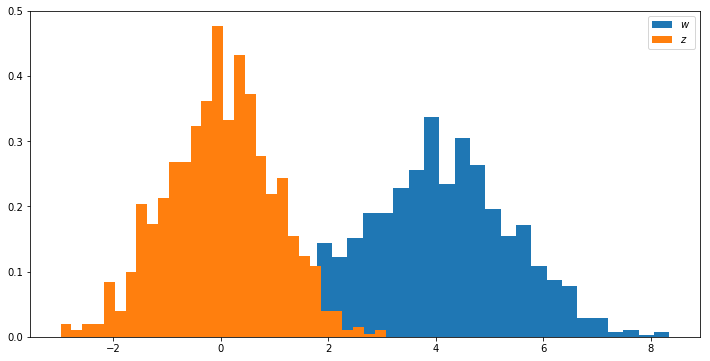

In [75]:
# First the standard normal
z_vec = np.random.normal(size=1000) # by convention, in statistics, z is often used to denote samples from the standard normal
w_vec = z_vec*np.sqrt(alpha) + mu
# plot normalized histogram of w, and then normalized histogram of z on top
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
ax.hist(w_vec, bins=30, density=True)
ax.hist(z_vec, bins=30, density=True)
_ = ax.legend(('$w$', '$z$'))

Now re-run this histogram with 100,000 samples and check that the both
histograms look qualitatively Gaussian.

### Sampling from the Prior

Let's use this way of constructing samples from a Gaussian to check what
functions look like *a priori*. The process will be as follows. First,
we sample a random vector $K$ dimensional from `np.random.normal`. Then
we scale it by $\sqrt{\alpha}$ to obtain a prior sample of
$\mappingVector$.

In [76]:
K = degree + 1
z_vec = np.random.normal(size=K)
w_sample = z_vec*np.sqrt(alpha)
print(w_sample)

[ 0.10635007 -1.41984901  1.7064365  -2.64739075  0.8791477 ]


Now we can combine our sample from the prior with the basis functions to
create a function,

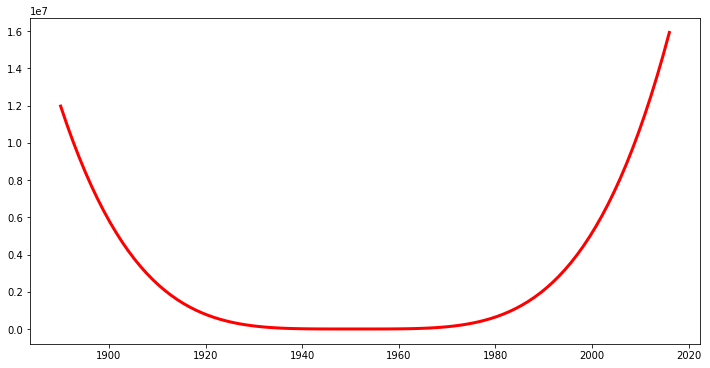

In [77]:
f_sample = np.dot(Phi_pred,w_sample)
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x_pred.flatten(), f_sample.flatten(), 'r-', linewidth=3)

This shows the recurring problem with the polynomial basis (note the
scale on the left hand side!). Our prior allows relatively large
coefficients for the basis associated with high polynomial degrees.
Because we are operating with input values of around 2000, this leads to
output functions of very high values. The fix we have used for this
before is to rescale our data before we apply the polynomial basis to
it. Above, we set the scale of the basis to 1. Here let's set it to 100
and try again.

In [78]:
scale = 100.
basis = mlai.basis(polynomial, number=degree+1, loc=loc, scale=scale)
Phi_pred = basis.Phi(x_pred)
Phi = basis.Phi(x)

Now we need to recompute the basis functions from above,

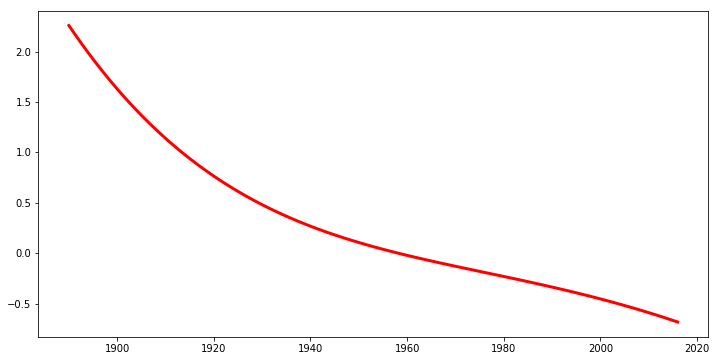

In [79]:
f_sample = np.dot(Phi_pred, w_sample)
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x_pred.flatten(), f_sample.flatten(), 'r-', linewidth=3)

Now let's loop through some samples and plot various functions as
samples from this system,

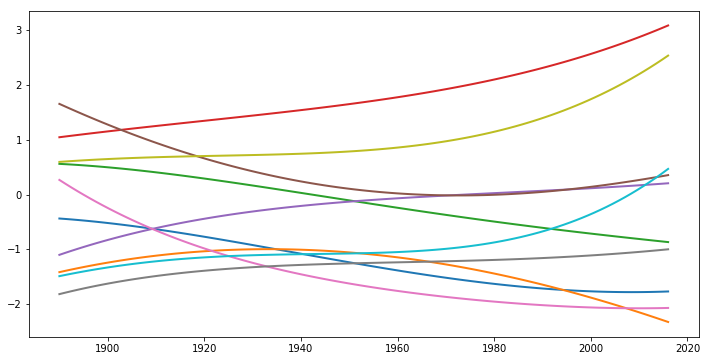

In [80]:
num_samples = 10
K = degree+1
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
for i in range(num_samples):
    z_vec = np.random.normal(size=K)
    w_sample = z_vec*np.sqrt(alpha)
    f_sample = np.dot(Phi_pred,w_sample)
    _ = ax.plot(x_pred.flatten(), f_sample.flatten(), linewidth=2)

The predictions for the mean output can now be computed. We want the
expected value of the predictions under the posterior distribution. In
matrix form, the predictions can be computed as $$
\mappingFunctionVector = \basisMatrix \mappingVector.
$$ This involves a matrix multiplication between a fixed matrix
$\basisMatrix$ and a vector that is drawn from a distribution
$\mappingVector$. Because $\mappingVector$ is drawn from a distribution,
this imples that $\mappingFunctionVector$ should also be drawn from a
distribution. There are two distributions we are interested in though.
We have just been sampling from the *prior* distribution to see what
sort of functions we get *before* looking at the data. In Bayesian
inference, we need to computer the *posterior* distribution and sample
from that density.

### Computing the Posterior

We will now attampt to compute the *posterior distribution*. In the
lecture we went through the maths that allows us to compute the
posterior distribution for $\mappingVector$. This distribution is also
Gaussian, $$
p(\mappingVector | \dataVector, \inputVector, \dataStd^2) = \gaussianDist{\mappingVector}{\meanVector_\mappingScalar}{\covarianceMatrix_\mappingScalar}
$$ with covariance, $\covarianceMatrix_\mappingScalar$, given by $$
\covarianceMatrix_\mappingScalar = \left(\dataStd^{-2}\basisMatrix^\top \basisMatrix + \alpha^{-1}\eye\right)^{-1}
$$ whilst the mean is given by $$
\meanVector_\mappingScalar = \covarianceMatrix_\mappingScalar \dataStd^{-2}\basisMatrix^\top \dataVector
$$ Let's compute the posterior covariance and mean, then we'll sample
from these densities to have a look at the posterior belief about
$\mappingVector$ once the data has been accounted for. Remember, the
process of Bayesian inference involves combining the prior,
$p(\mappingVector)$ with the likelihood,
$p(\dataVector|\inputVector, \mappingVector)$ to form the posterior,
$p(\mappingVector | \dataVector, \inputVector)$ through Bayes' rule, $$
p(\mappingVector|\dataVector, \inputVector) = \frac{p(\dataVector|\inputVector, \mappingVector)p(\mappingVector)}{p(\dataVector)}
$$ We've looked at the samples for our function
$\mappingFunctionVector = \basisMatrix\mappingVector$, which forms the
mean of the Gaussian likelihood, under the prior distribution. I.e.
we've sampled from $p(\mappingVector)$ and multiplied the result by the
basis matrix. Now we will sample from the posterior density,
$p(\mappingVector|\dataVector, \inputVector)$, and check that the new
samples fit do correspond to the data, i.e. we want to check that the
updated distribution includes information from the data set. First we
need to compute the posterior mean and *covariance*.

### Bayesian Inference in the Univariate Case

This video talks about Bayesian inference across the single parameter,
the offset $c$, illustrating how the prior and the likelihood combine in
one dimension to form a posterior.

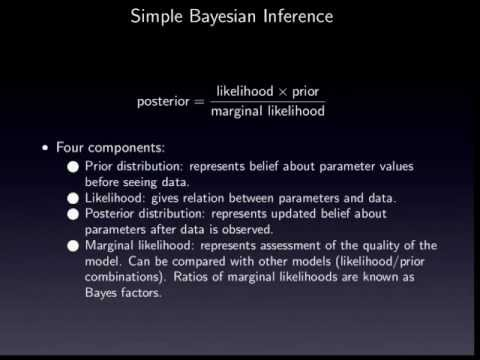

In [81]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('AvlnFnvFw_0')

### Multivariate Bayesian Inference

This section of the lecture talks about how we extend the idea of
Bayesian inference for the multivariate case. It goes through the
multivariate Gaussian and how to complete the square in the linear
algebra as we managed below.

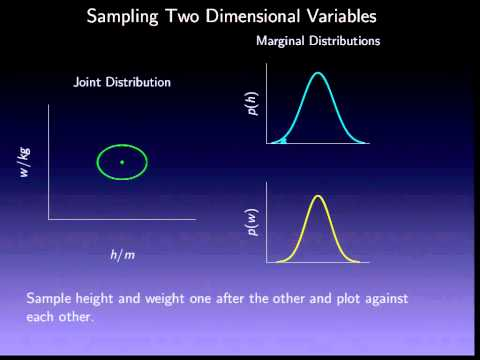

In [82]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('Os1iqgpelPw')

The lecture informs us the the posterior density for $\mappingVector$ is
given by a Gaussian density with covariance $$
\covarianceMatrix_w = \left(\dataStd^{-2}\basisMatrix^\top \basisMatrix + \alpha^{-1}\eye\right)^{-1}
$$ and mean $$
\meanVector_w = \covarianceMatrix_w\dataStd^{-2}\basisMatrix^\top \dataVector.
$$

### Question 1

Compute the covariance for $\mappingVector$ given the training data,
call the resulting variable `w_cov`. Compute the mean for
$\mappingVector$ given the training data. Call the resulting variable
`w_mean`. Assume that $\dataStd^2 = 0.01$

*10 marks*

In [83]:
# Write your answer to Question 1 here

### Marginal Likelihood

-   The marginal likelihood can also be computed, it has the form: $$
      p(\dataVector|\inputMatrix, \dataStd^2, \alpha) = \frac{1}{(2\pi)^\frac{n}{2}\left|\kernelMatrix\right|^\frac{1}{2}} \exp\left(-\frac{1}{2} \dataVector^\top \kernelMatrix^{-1} \dataVector\right)
      $$ where
    $\kernelMatrix = \alpha \basisMatrix\basisMatrix^\top + \dataStd^2 \eye$.

-   So it is a zero mean $\numData$-dimensional Gaussian with covariance
    matrix $\kernelMatrix$.

### References {#references .unnumbered}